# Classification

#### Saloni Gupta

## I. Introduction
For this assignment we will be studying about the classification techniques in machine learning. Our focus will be towards understanding, implementing, deploying and analyzing four classification models namely:

* Pocket Algorithm
* Quadratic Discriminant Analysis
* Linear Discriminant Analysis
* Logistic Regression

Classification problems are those in which the the output is a category and so we try to use previously known values to draw conclusions. We use one or more input values to predict one or more out values. We simply use the linear model, that is, Y = Xw, by simply discretizing Y.

For this assignment I will be using the same dataset that I used for the first assignment in the classification category, that is, adult census income dataset from UCI repository(UCI Machine Learning Repository: Adult Data Set). 

The very first step is preprocessing the dataset. In the phase, I am removing null values or any noise that might exist and also will be dividing the dataset into test and train dataset. As the names suggest, I will train the model using train dataset and will use the test dataset to perform tests and identify the accuracy and results and analyse them for finding the most appropriate model. 

Then I will be visualizaing the dataset to find certain trends or patterns to analyze before implementing and deploying the classification models.

I will be writing the algorithmic codes for the four models, that are, Pocket algorithm, Quadratic Discriminant Analysis, Linear Discriminant Analysis and Logistic Regression. 

I will them train the model using the dataset and will test it further analysing the results using evaluation metrics like confusion matrix, precision, recall, specificity, ROC AUC score, accuracy and F1 score. 

I will be plotting the results in order to visualize them better for greater understanding.

## II. Data
## Introduction of data for classification and source
The dataset that I have selected to visualize represents the income census information of adult individuals and I have selected this income census dataset from the UCI repository(UCI Machine Learning Repository: Adult Data Set). This dataset has been traced from 1994 census database and comprises of information about age groups, work-classes, level of education, country, occupations, etc. It comprises of the following labels:
* age
* workclass
* fnlwgt
* education
* education_num
* marital_status
* occupation
* relationship
* race
* sex
* capital_gain
* capital_loss
* hours_per_week
* native_country
* income

Datasets like this one is widely used for building prediction models about future census information. This dataset houses information of more than 30,000 people. Such datasets can be really helpful in predicting future census information if studied well and can be a good resource.

### Reading the data
The dataset dates-back to the income census database of 1994 and I have sourced this from the UCI repository(UCI Machine Learning Repository: Adult Data Set). The dataset provides information of more than 30,000 people telling about their age, workclass, occupation, country, capital gain, capital loss, level of education, race, biological sex, marital status and about their annual income. This dataset can be used to classify and group people earning more than or less than 50,000 annually and also can be used for future scope for predicting census.


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv("adult.csv")

In the above section, I have simply read the csv file using pandas.

### Preprocessing

In this section, I have first manually remaned the column names to make them more understandable. Then, I have used the info() and describe() functions to check the details of the dataset. I have narrowed down the dataset by dropping all the irrelevant columns and rows which consisted of null value that is, '?'. Then to utilize the textual data more efficiently, I have converted the textual data into numerical data for all the relevant columns. The last and final step in preprocessing is dividing the dataset into train and test dataset which I have performed in the end.

In [143]:
df = df.drop(columns=['fnlwgt', 'education_num','capital_gain', 'capital_loss', 'native_country'])
df = df.replace({'?':np.nan}).dropna()
df = df.dropna()
df = df.reset_index(drop=True)

In the above section, I have dropped rows that have '?' and dropped the irrelevant columns.

In [144]:
df['sex']=df['sex'].map({'Male': 1, 'Female': 2})
df['workclass']=df['workclass'].map({'State-gov': 1, 'Self-emp-not-inc': 2,'Private': 3, 'Federal-gov': 4, 'Local-gov': 5, 'Self-emp-inc': 6, 'Never-worked': 7,'Without-pay':8 })
df['education']=df['education'].map({'Preschool': 1, '1st-4th': 2,'5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7,'12th':8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13,'Masters':14, 'Prof-school':15, 'Doctorate': 16})
df['marital_status']=df['marital_status'].map({'Married-spouse-absent': 1, 'Married-civ-spouse': 2,'Never-married': 3, 'Widowed': 4, 'Separated': 5, 'Divorced': 6, 'Married-AF-spouse': 7 })
df['occupation']=df['occupation'].map({'Adm-clerical': 1, 'Farming-fishing': 2,'Machine-op-inspct': 3, 'Other-service': 4, 'Craft-repair': 5, 'Prof-specialty': 6, 'Handlers-cleaners': 7,'Priv-house-serv':8, 'Armed-Forces': 9, 'Exec-managerial': 10, 'Sales': 11, 'Protective-serv': 12, 'Tech-support': 13,'Transport-moving':14})
df['relationship']=df['relationship'].map({'Husband': 1, 'Wife': 2,'Unmarried': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Own-child': 6})
df['race']=df['race'].map({'White': 1, 'Black': 2,'Other': 3, 'Asian-Pac-Islander': 4, 'Amer-Indian-Eskimo': 5})
df['income']=df['income'].map({'<=50K': -1, '>50K': 1})

In the above section, I have mapped the textual data with integer data to make it easy to process.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 10 columns):
age               30718 non-null int64
workclass         30718 non-null int64
education         30718 non-null int64
marital_status    30718 non-null int64
occupation        30718 non-null int64
relationship      30718 non-null int64
race              30718 non-null int64
sex               30718 non-null int64
hours_per_week    30718 non-null int64
income            30718 non-null int64
dtypes: int64(10)
memory usage: 2.3 MB


In [5]:
df.describe()

age     workclass     education  marital_status    occupation  \
count  30718.000000  30718.000000  30718.000000    30718.000000  30718.000000   
mean      38.443584      3.111563     10.130314        3.016245      6.646331   
std       13.118227      0.938876      2.562469        1.388507      3.878278   
min       17.000000      1.000000      1.000000        1.000000      1.000000   
25%       28.000000      3.000000      9.000000        2.000000      4.000000   
50%       37.000000      3.000000     10.000000        3.000000      6.000000   
75%       47.000000      3.000000     13.000000        3.000000     10.000000   
max       90.000000      8.000000     16.000000        7.000000     14.000000   

       relationship          race           sex  hours_per_week        income  
count  30718.000000  30718.000000  30718.000000    30718.000000  30718.000000  
mean       2.883879      1.243212      1.323263       40.949313     -0.501921  
std        1.840914      0.708658      0.467730       11.985382      0.864928  
min        1.000000      1.000000      1.000000        1.000000     -1.000000  
25%        1.000000      1.000000      1.000000       40.000000     -1.000000  
50%        3.000000      1.000000      1.000000       40.000000     -1.000000  
75%        4.000000      1.000000      2.000000       45.000000     -1.000000  
max        6.000000      5.000000      2.000000       99.000000      1.000000

In [6]:
df.corr()

age  workclass  education  marital_status  occupation  \
age             1.000000   0.065227   0.043567        0.019833    0.057526   
workclass       0.065227   1.000000   0.060154       -0.012228    0.059000   
education       0.043567   0.060154   1.000000       -0.049080    0.128429   
marital_status  0.019833  -0.012228  -0.049080        1.000000   -0.089471   
occupation      0.057526   0.059000   0.128429       -0.089471    1.000000   
relationship   -0.428724  -0.047297  -0.103210        0.482370   -0.132114   
race           -0.027655   0.001199  -0.011556        0.009748   -0.031837   
sex            -0.082117  -0.005176  -0.007443        0.376745   -0.176347   
hours_per_week  0.101879   0.065024   0.151241       -0.079247    0.124495   
income          0.242431   0.095216   0.334640       -0.275809    0.170666   

                relationship      race       sex  hours_per_week    income  
age                -0.428724 -0.027655 -0.082117        0.101879  0.242431  
workclass          -0.047297  0.001199 -0.005176        0.065024  0.095216  
education          -0.103210 -0.011556 -0.007443        0.151241  0.334640  
marital_status      0.482370  0.009748  0.376745       -0.079247 -0.275809  
occupation         -0.132114 -0.031837 -0.176347        0.124495  0.170666  
relationship        1.000000  0.050522  0.381115       -0.287766 -0.420642  
race                0.050522  1.000000  0.055778       -0.029937 -0.051794  
sex                 0.381115  0.055778  1.000000       -0.230321 -0.216626  
hours_per_week     -0.287766 -0.029937 -0.230321        1.000000  0.228547  
income             -0.420642 -0.051794 -0.216626        0.228547  1.000000

### Visualization of data

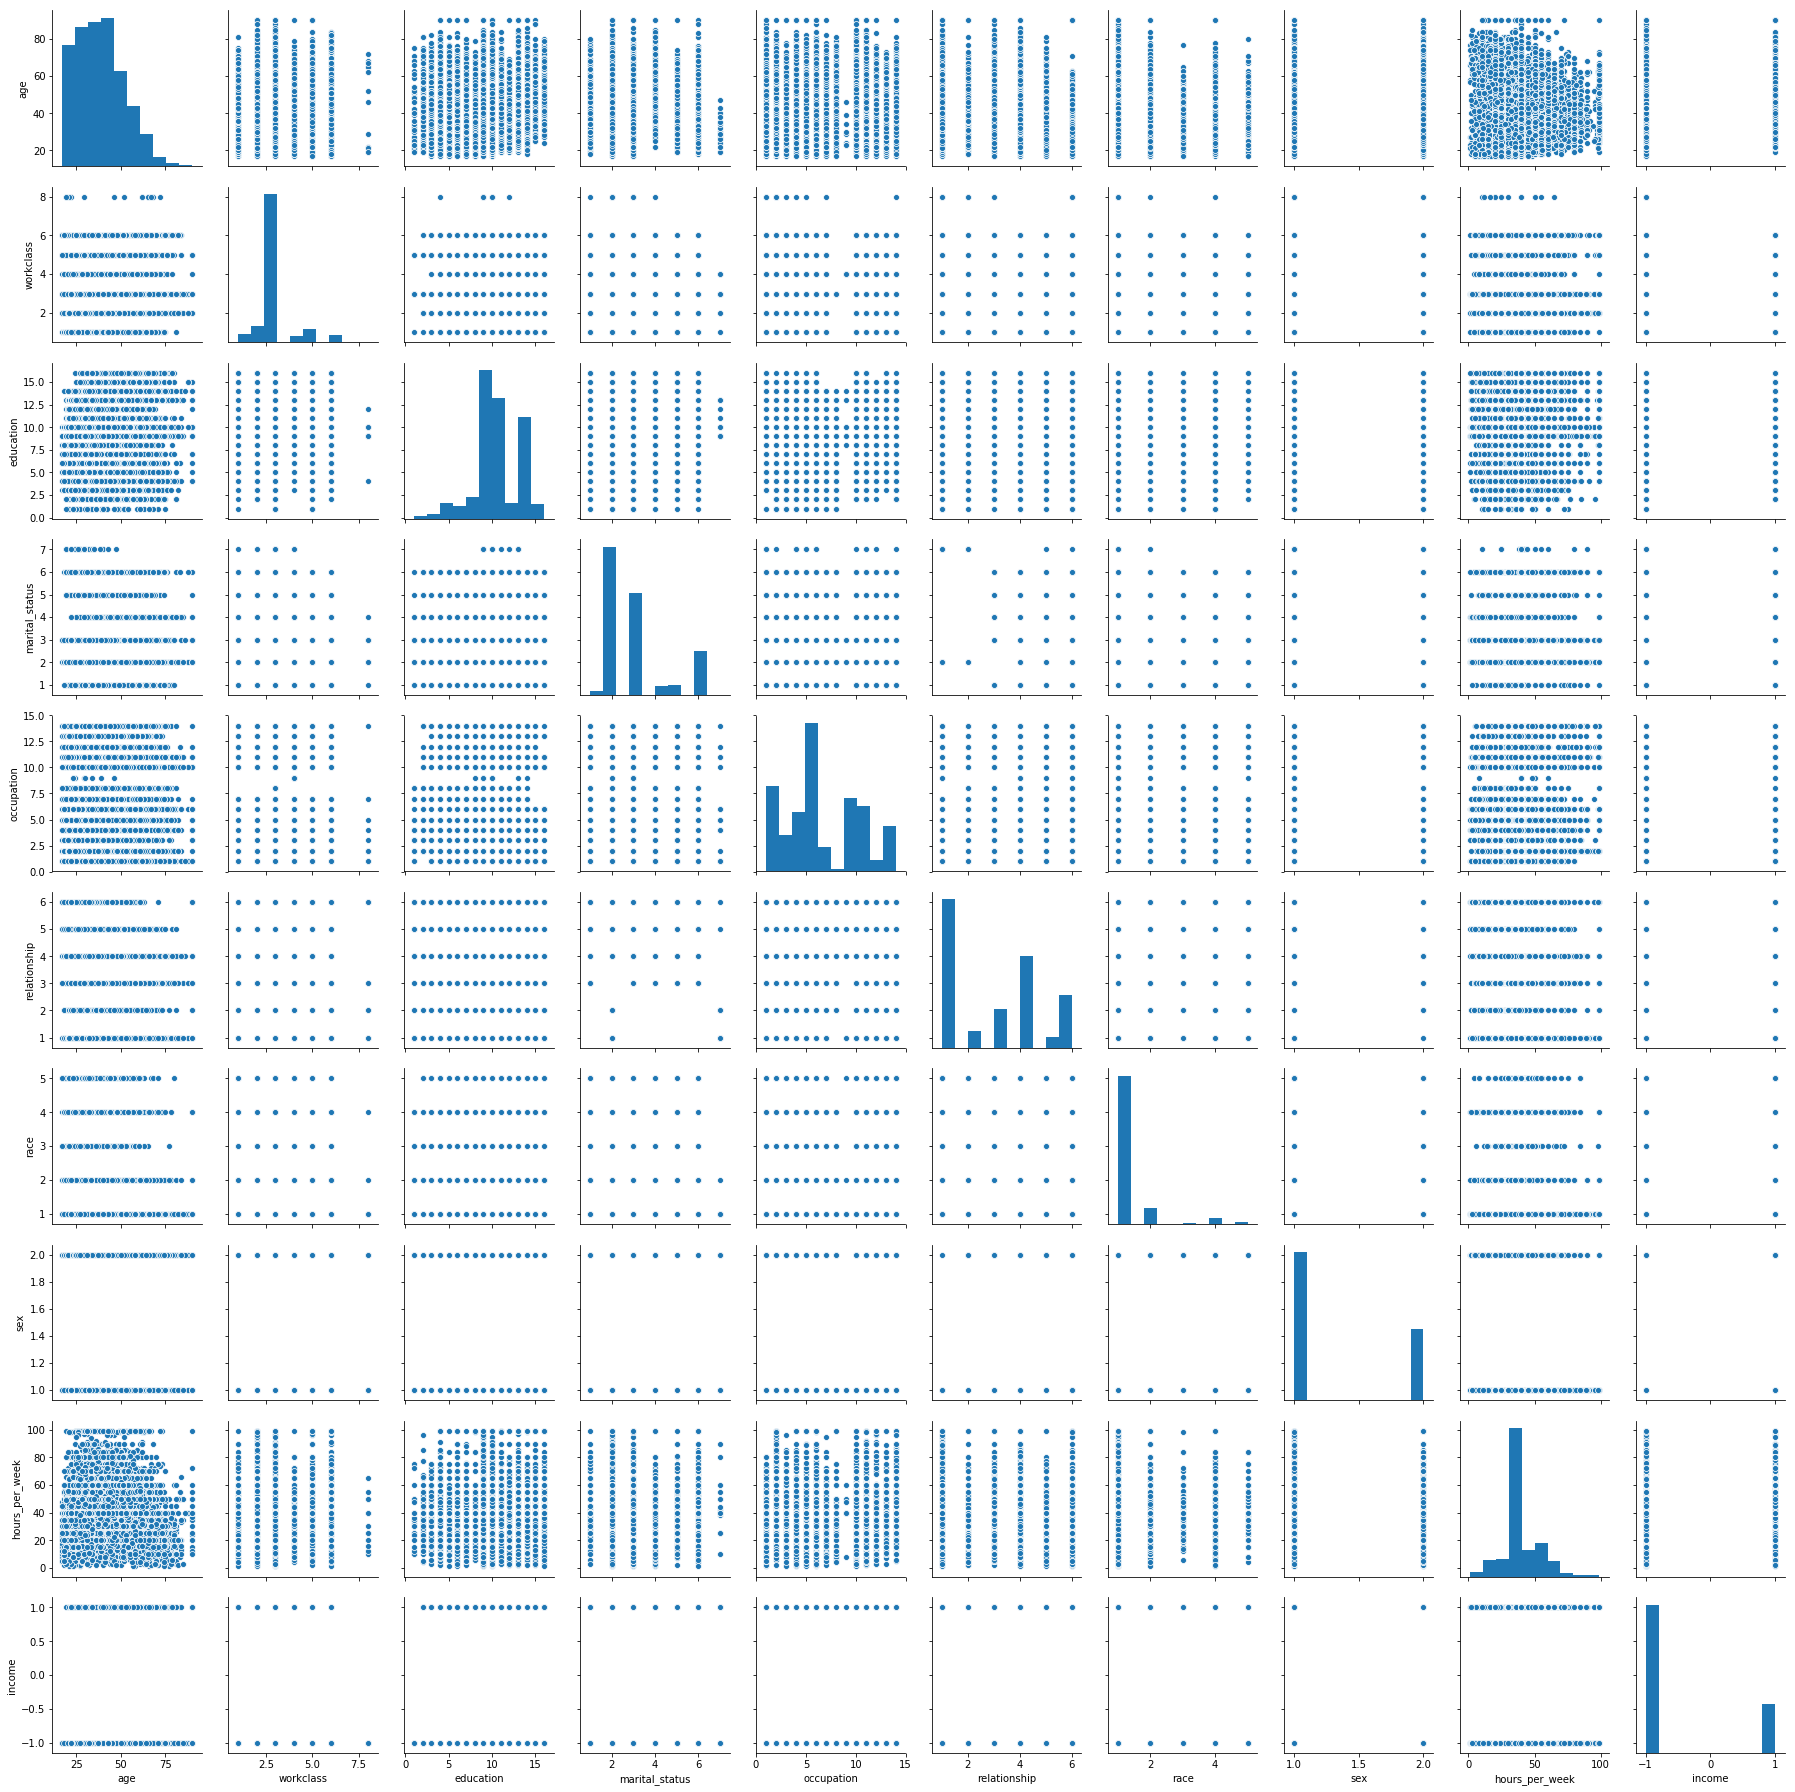

In [8]:
sns.pairplot(df)

The above pairplot graph depicts the simple relationship between every pair of variables in the dataset. These plots help identify any linear relationship or any pattern that might exist between two variables. The graph above uses scatterplot to create these plots in seaborn library. 

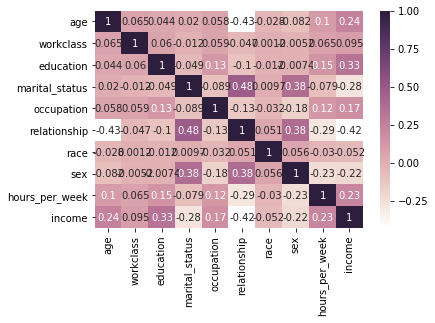

In [9]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)

In the above plot, I have used seaborn library to build a correlation matrix which gives us a clear numerical value of how closely two variables are correlated. We can see in the graph above that income is largely correlated with age, education and hours_per_week. Similarly, relationship has high correlation with marital status as well as sex. Thus, we can deduce many such correlations for further studies.

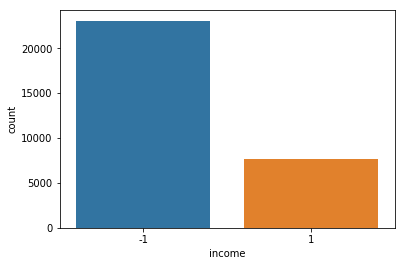

In [10]:
sns.countplot(df['income'],label="Count")
plt.show()

In the above plot, I have tried to count the number of individuals earning greater than 50K and individuals earning less than or equal to 50K a year. It is quite evident, that there is a larger population earning less than equal to 50K and thus more individuals lie in that particular spectrum. I have used a countplot for counting the number of people with the help of seaborn library.

C:\Users\salon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


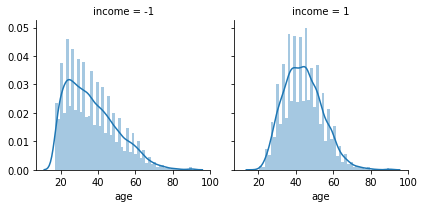

In [11]:
df1 = sns.FacetGrid(df, col='income')
df1.map(sns.distplot, "age")


From the plot above, we can observe that in the spectrum of earning income less than equal to 50K, majority people are at the age of 30 or near 30 while in the other income band, people earning greater than 50K are mostly in the age group of 40-50.

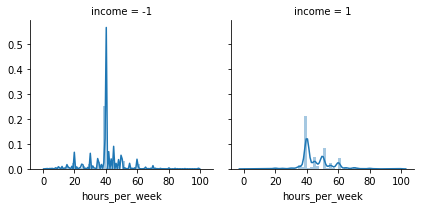

In [12]:
df1 = sns.FacetGrid(df, col='income')
df1.map(sns.distplot, "hours_per_week")

I have used the seaborn library to create the plot above, which depicts that amongst the people earning less than equal to 50K, majority individuals work for around 40-45 hours per week. Which shows that even though they work a lot, they might not be doing very well paid jobs. Similarly, int he other income band also it is evident that people majorly are working for around 40 hours per week which goes to show that there might be a huge difference in wither the level of education or level of work or maybe both since mostly all individuals are working for more or less the same time.

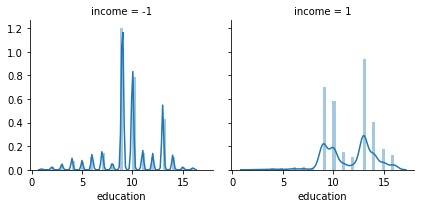

In [13]:
df1 = sns.FacetGrid(df, col='income')
df1.map(sns.distplot, "education")

The above plot shows a comparison in level of education for people earning income, we can see that amongst people earning less than equal to 50K, most people are level 8-10 educated while people earning more are pretty highly educated between level 13-15. There are very few peopl in the lesser income category who are educated to level 15 or 16.

Text(0, 0.5, 'number of people')

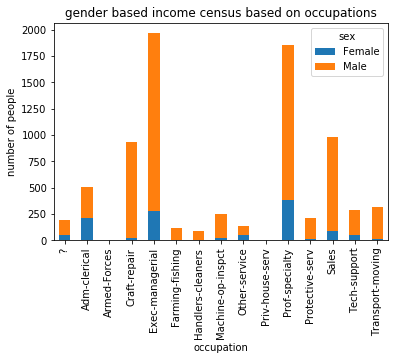

In [14]:
df2 = pd.read_csv("adult.csv")
mylist = ['>50K']
df2 = df2[df2['income'].isin(mylist)]
df2 = df2.groupby(['occupation','sex']).size().sort_values(0, ascending=False)
df2.unstack().head()
my_plot = df2.unstack().plot(kind='bar', stacked=True, title='gender based income census based on occupations')
my_plot.set_xlabel("occupation")
my_plot.set_ylabel("number of people")

For this graph, I have tried to determine the gender-based income census information referring only to people earning more than 50K income. Here the reference is not only to gender but to the field of occupation the individual is involved in. For this I have used stacked bar graph to show the comparison between the two genders. In order to only represent information of individuals earning more than 50K, I have filtered the data by selecting only information of those that come within the slab. We can clearly see that the males are able to contribute the most in every single occupation. There are also occupations where the contribution of women is negligible in earning more than 50K income. This graph not only tells us which gender contributes most but also tells us the occupation which contributes the most towards earning 50K a year. Thus this solves helps establish a connection between gender and occupation that prominently contribute towards the higher earning slab. Also establishes separate connections between census-gender and census-occupation. I have used matplotlib library (Matplotlib: Python Plotting — Matplotlib 3.0.2 Documentation) and pandas library (Python Data Analysis Library — Pandas: Python Data Analysis Library) for plotting the graph.

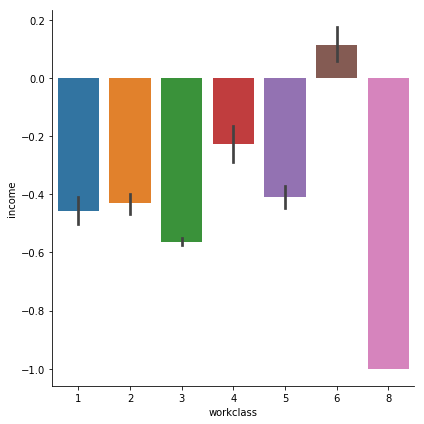

In [15]:
sns.catplot(data=df, x="workclass", y="income",height=6,orient = 'v', kind='bar')


Just like the previous plot, I have used the seaborn library to design this catplot, which depicts that self-employed-inc people are highly likely to be earning more than 50K followed by federal-gov employees in comparison to others. And the graph looks inverted because I have used -1,1 as mapping values for target variable

### Preliminary Observations

* It can be firstly observed that there exists a high level of correlation between income, age, education and hours_per_week. Similarly sex, relationship and marital status are also highly correlated to each other.

* Then it can be observed that amongst people earning greater than 50K a year, most individuals are male, rather than female and occupationwise, maximum people work in the field of Exec-managerial and prof-specialty.

* Also it is highly likely that an individual would earn more if his level of education is higher and thus the workclass would be higher giving higher pay. 

* By observing the work hours per week we can say that more or less individuals are working for similar time ranges yet there lies a huge difference in the incomes.

* In terms of relationship status and marital status most people are either a husband or a wife and have either married a civilian or armed force person and falls in the higher income range.

* We can also notice that most people belonging to lesser income category are around the age of 30 while individuals earning greater are more towards their fifties.

* Largely this dataset also tells us that there are many more people earning lesser than or equal to 50K in comparison to people earning more than 50K.

## III. Method

From this section onwards I will be implementing the algorithms for classification.

### Super Class Definition

In [101]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

We have been provided with a super class definition which comprise of two classes, BaseModel and Classifier. BaseModel class comprises of two methods, train() and use(). Similarly, Classifier class comprises of __init__(), normalize(), check_matrix(), add_ones() and abstract methods, train() and use(). normalize() calculates the mean and standard deviation. check_matrix() and add_ones() both check if the passed arguments are in 2D matrix or not but the difference is that if that arguments are not in 2D, check_matrix() raises the value error whereas add_ones() adds a column of ones in the beginning.

### Pocket Algorithm
To understand Pocket algorithm, it is important we get familiar with perceptron algorithm. 
* Perceptron Algorithm:

In most basic terms, perceptron algorithm is a more general computational model that takes an input, aggregates weighted sum and returns 1 only if the aggregated sum is more than some threshold else returns 0. A single perceptron can only be used to implement linearly separable functions. It takes both real and boolean inputs and associates a set of weights to them along with a bias. So basically a perceptron is a linear model that applies a step function on linear outputs. In order to perform classification, it iterates over repeatedly on input data and keeps adjusting weights to minimize errors.

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

* Pocket algorithm:

Pocket algorithm is a variant of Perceptron algorithm. Just as perceptron algorithm it iterates over training samples and updates the weights repeatedly but it is still possible that the last updated weight is not the bets solution so in order to overcome this disadvantage, Pocket algorithm keeps the best solution found in its pocket that is w_pocket. And thus using this bet solution, it updates weight only if a better solution is found. 


In [102]:
from copy import deepcopy as copy 
class Pocket_Algorithm(Classifier):
    def __init__(self, alpha, maxiter):
        self.maxiter = maxiter
        self.alpha = alpha
        self.w = None
        self.w_pocket = None

    @staticmethod
    def compare(X, T, w, w_pocket):
        y = np.sign(X @ w)
        yp = np.sign(X @ w_pocket)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    def train(self, X, T):
        N = X.shape[0]
        X = self.normalize(X)  
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
        for i in range(self.maxiter):
            converged = True
            for k in range(N): 
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        print(self.w_pocket)
        plt.plot(X@self.w_pocket)

    def use(self, X):
        return np.sign(X @ self.w_pocket)


* compare(): this method is basically used for comparing weights. It takes in four arguments, X(array of independent variables), T(array of target variables), w(weight), w_pocket(best weight so far) and compares if the new weight w is better than w_pocket. If it is better then updates the weights else it continues the computation.
* train(): this method takes in two arguments, X(array of independent variables), T(array of target variables). It starts by initializing the weights to zero and copying the weight to w_pocket. Then it starts iterating to update the weights using th elearning rate. It calls the compare function to compare the weights and update weight if necessary. The training and updation continues for maxiter times.
* use(): This method takes in one argument, which is X(array of independent variables) and uses the training provided earlier to predict the target variables. This method is done for test data and train method is done for train data.



### QDA
To understand Quadratic Discriminant Analysis, it is important that we first understand discriminant analysis.

* Discriminant Analysis:

Discriminant analysis is a classififcation problem, where two or more groups/clusters and one or more new observations are classified into one of the known populationsbased on measured characteristic. It focuses on two processes, namely, group separation and prediction. Group separation works by using few variables of dependent variables as discriminant function to maximise the separation among groups. Prediction as the name suggests, predicts new groups with the help of QDA and LDA.
It used Bayes rule for classification:


$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)} \\
    \\
\end{align*}
$$

By plugging in the gaussian m=normal distribution, the equation becomes:

$$
P(T = k \mid x) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k)} P(T = k)} { P(x) }.
$$

* Quadratic Discriminant Analysis:

QDA is used for heterogenous variance-covariance matrices  and we when we consider separating covariance for every class. Since the discriminant function is quadratic, the decision boundary is also quadratic.

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$




In [103]:
class QDA_Algorithm(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.mu2=None
        self.Sigma1=None
        self.Sigma2=None
        self.prior1=None
        self.prior2=None
        self.d1=None
        self.d2=None

    def QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) + np.log(prior)
    
    def train(self,X,T):
        X = self.normalize(X)
        data = pd.DataFrame(X)
        data['income']=T
        X1=(data[data.income == -1]).drop(['income'],axis=1)
        X2=(data[data.income == 1]).drop(['income'],axis=1)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        N = N1 + N2
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N
    
    def use(self,X):
        X = self.normalize(X)
        self.d1 = np.array(self.QDA(X,np.matrix(self.mu1),self.Sigma1,self.prior1)).flatten()
        self.d2 = np.array(self.QDA(X,np.matrix(self.mu2),self.Sigma2,self.prior2)).flatten()
        dataframe = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        prediction = np.where(dataframe['d1']>dataframe['d2'],-1,1)
        return prediction,self.d1,self.d2
        

* QDA(): It takes in inputs X(feature matrix), mu, Sigma and prior for calculating the discriminant value for each class.
* train(): It takes in inputs X(feature variables) and T(target variables) and normalizes the X. Now in order to find discriminant value for each class, we divide data based on classes. I have divided the data based on income into X1 and X2. Using these two separate classes we calculate the values for mu1, mu2, Sigma1, Sigma2, prior1, prior2.
* use(): It takes in an input X(feature variables) and then normalizes X. It uses the values calculated in train and then calls QDA() to calculate and return the discriminant values. 

### LDA
We use LDA when it is assumed that all classes have same covariance matrix. This removes that quadratic term and generates a model with linear decision boundary. 

Discriminant function is defined as
$$
\delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

for a new sample x model can predict the label with
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

it performs better with less amount of data and when variance of different classes is mostly similar.

In [104]:

class LDA_Algorithm(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.mu2=None
        self.Sigma=None
        self.prior1=None
        self.prior2=None
        self.d1=None
        self.d2=None

    def LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu - 0.5 * np.dot(mu, sigma_inv) * mu + np.log(prior), axis=1)
    
    def train(self,X,T):
        X=self.normalize(X)
        data = pd.DataFrame(X)
        data['income']=T
        X1=(data[data.income == -1]).drop(['income'],axis=1)
        X2=(data[data.income == 1]).drop(['income'],axis=1)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        N = N1+N2
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma = np.cov(X.T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
    
    def use(self,X):
        X=self.normalize(X)
        self.d1 = np.array(self.LDA(X,np.array(self.mu1),self.Sigma,self.prior1)).flatten()
        self.d2 = np.array(self.LDA(X,np.array(self.mu2),self.Sigma,self.prior2)).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

* LDA(): It takes in inputs X(feature matrix), mu, Sigma and prior for calculating the discriminant value.
* train(): It takes in inputs X(feature variables) and T(target variables) and normalizes the X. Now in order to find discriminant value for each class, we divide data based on classes. I have divided the data based on income into X1 and X2. Using these two separate classes we calculate the values for mu1, mu2, Sigma, prior1, prior2.
* use(): It takes in an input X(feature variables) and then normalizes X. It uses the values calculated in train and then calls LDA() to calculate and return the discriminant values. 

### Logistic Regression
Logistic regression basically is a linear regression model that directly predicts P(T = k|x), not the class label k. This method does not predict the label directly.The model used for Logistic Regression is as below: 

$$
\kappa = f(x ; w) = X w.
$$

As per gradient descentm we need to update the weights. We do this as below: 


$$
w \leftarrow w - \alpha \nabla_w E(w).
$$

We use the softmax function as given below:

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

And hence the weight updation becomes:


$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$


In [105]:
class Logistic_Regression(Classifier): 
    def __init__(self,alpha,niter):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
        self.niter = niter
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
       
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(self.niter):
            self.w += self.alpha * X.T @ (T - self.g(X,self.w)) 
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

* softmax(): It takes in input z which is the dot product of X(feature matrix) and w(weights). This generalizes the logistic sigmoid function.
* g(): It take sin input X(feature matrix) and w(weights) and calculates the dot product to send to softmax() fucntion.
* train(): It takes in inputs X(feature matrix) and T(target matrix) and normalizes X first. Then calculates N, D, K and initializes weights to zero. Then adds ones to X and T and reshapes T. Then the shape of T is modified. A loop iterates niter times,  for updating weights.
* use(): It takes in input X(feature matrix) and normalizes it. It also adds a column of ones and calculates the output based on weights learned earlier.

## Experiments
### Evaluation Metrices:
In order to identify and calibrate which model works best, we need to use certain criterias for measuring the accuracies. These criterias are what we call evaluation metrices. 

* Accuracy:
This is probably the most simple and general metrics for checking how good the model is. It simply calculates the number of correctly classified samples against total number of samples. 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

This will tell the overall result of the model but will not tell anything about the performance of each class.

* Confusion Matrix:
Confusion matrix lists the counts for all the classes thereby giving more information about the model.


 | - | + 
 --|--|--
 - | True Negative (TN) | False Negative (FN)
 + | False Positive (FP) | True Positive (TP)

1. <b>TP or True positives</b> are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
2. <b>Tn or True negatives</b> are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False)
3. <b>FP or False positives </b> are the cases when the actual class of the data point was 0(False) and the predicted is 1(True)
4. <b>FN or False negatives</b> are the cases when the actual class of the data point was 1(True) and the predicted is 0(False)


* Precision:
The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

* Recall:
This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

* Specificity:
 Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

* F1 Score:
Instead of using two metrics, F1 is calculated as the harmonic mean of precision and recall as it provides one value of measure. If either one is really small between precision and recall, the F1 Score raises a flag and is closer to the smaller value than the bigger one, giving the model an appropriate score rather than just an arithmetic mean.

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

* ROC Curve:
The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). 
As in the figure below, starting from the boundary (or threshold) with 0% of false positive rate, moving the boundary, it shows the true positive rate by including more false positive areas.
When the classification results are good, the curve gets close to retangular curve, close to 1 on the 0 FPR. 

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)
(image from wikipedia)

* AUC:
For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#### Data Partitioning

In [121]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

For partitioning I am going to be using the code provided by the professor but to ensure that equal amount of data is fed for every class, I will be selecting rows based on the classified value, that is, -1 and 1 in my case and select equal number of rows from each class.

### Experiments for Pocket Algorithm

## Experiment 1: All feature values used with alpha 0.1 and maxiter 10
On test data

In [155]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=600)
T2 = T2.sample(n=600)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (960, 9)
The Shape of T train data set is (960, 1)
The Shape of X test data set is (240, 9)
The Shape of T test data set is (240, 1)


End of training:  9
[-0.10910184 -0.00260046  0.33393411 -0.31910315 -0.30204441 -0.51883633
 -0.1395823   0.19538598  0.31009924]


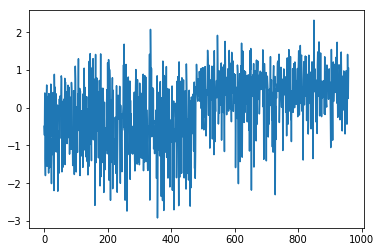

In [156]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1, 10)
p.train(X, T)

[-1  1]


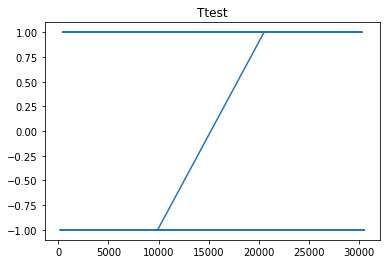

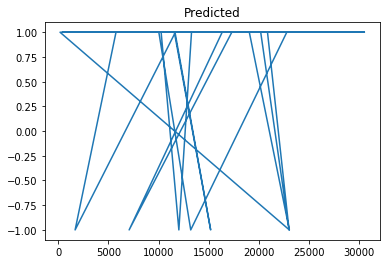

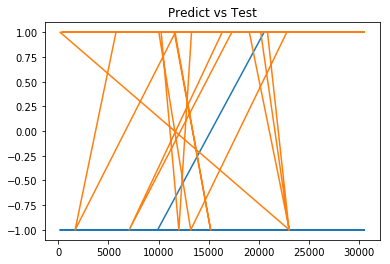

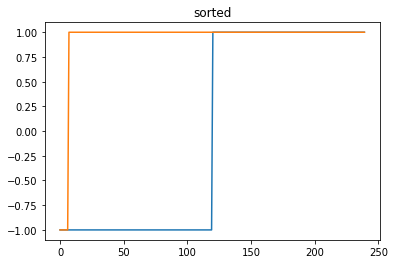

Accuracy: 0.5125
F1 score: 0.668555240793201
precision:  0.9833333333333333
recall:  0.5064377682403434
specificity:  0.7142857142857143
ROC_AUC_Score:  0.5125
[[  5 115]
 [  2 118]]
              precision    recall  f1-score   support

          -1       0.71      0.04      0.08       120
           1       0.51      0.98      0.67       120

   micro avg       0.51      0.51      0.51       240
   macro avg       0.61      0.51      0.37       240
weighted avg       0.61      0.51      0.37       240



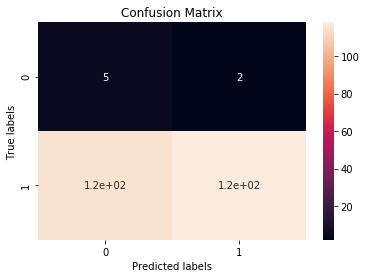

In [157]:
print(np.unique(Ttest))
Predict = p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))

In the above experiment I have used all the feature variables against target variable income with total dataset size 1200, learning rate 0.1 and number of iterations being 0.1. I was able to get an accuracy of 0.54, F1 score of 0.68, Precision of 0.99, Recall of 0.52, Specificity of 0.91 and ROC score of 0.54. From the result I can see that the algorithm did not perform very well. It predicted majority of ones and very few zeroes. Also it is a very time taking algorithm with very low accuracy. 

On train data

[-1  1]
End of training:  9
[ 0.1892221  -0.05325227  0.12598497 -0.01476135 -0.18484805 -0.75733078
  0.04642263  0.27995609  0.25720032]


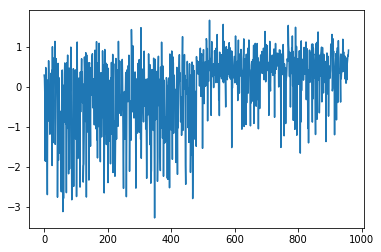

In [96]:
print(np.unique(Ttrain))
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1, 10)
p.train(X, T)


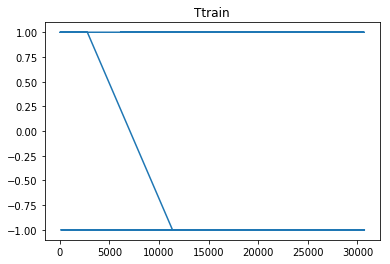

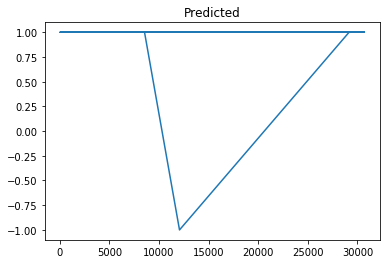

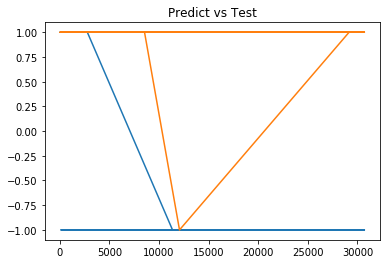

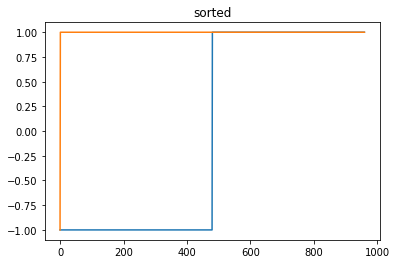

Accuracy: 0.5010416666666667
F1 score: 0.6671299513551078
precision:  1.0
recall:  0.5005213764337852
specificity:  1.0
ROC_AUC_Score:  0.5010416666666666
[[  1 479]
 [  0 480]]
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       480
           1       0.50      1.00      0.67       480

   micro avg       0.50      0.50      0.50       960
   macro avg       0.75      0.50      0.34       960
weighted avg       0.75      0.50      0.34       960



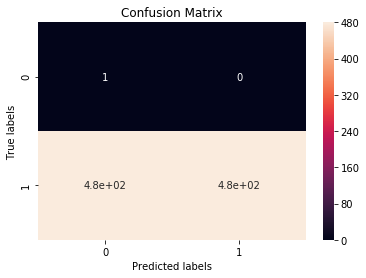

In [97]:
Predict=p.use(Xtrain)
plt.title("Ttrain")
plt.plot(Ttrain)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttrain)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttrain))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttrain)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttrain,Predict))
print('F1 score:', f1_score(Ttrain,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttrain, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttrain, Predict)
print(cf)
print(classification_report(Ttrain,Predict))

In the above experiment I have used all the feature variables against one target variable which is income. To check train and test accuracy I performed the experiment similar to the previous one using train dataset. I kept the dataset size 1200 and learning rate 0.1 and number of iterations being 0.1. In this case my algorithm has worked almost similar to the one performed on test data with a slightly highe rprecision value.

## Experiment 2: All feature variables with differing learning rate and maxiter 10

End of training:  9
[ 0.13565117  0.00314469  0.46538648  0.18804048  0.03495513 -0.79334044
 -0.15887455  0.27082893 -0.10931163]


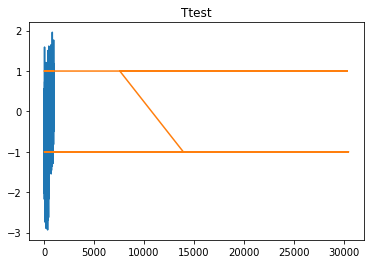

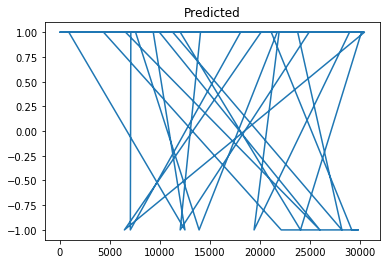

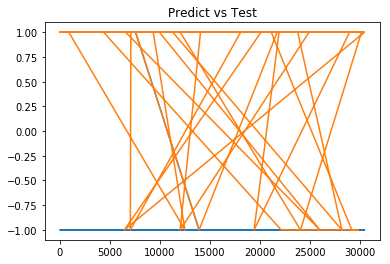

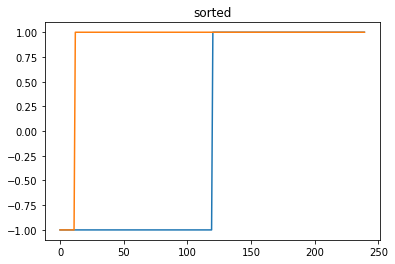

Accuracy: 0.5416666666666666
F1 score: 0.6839080459770115
precision:  0.9916666666666667
recall:  0.5219298245614035
specificity:  0.9166666666666666
ROC_AUC_Score:  0.5416666666666667
[[ 11 109]
 [  1 119]]
              precision    recall  f1-score   support

          -1       0.92      0.09      0.17       120
           1       0.52      0.99      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.72      0.54      0.43       240
weighted avg       0.72      0.54      0.43       240

End of training:  9
[ 0.27130234  0.00628938  0.93077295  0.37608097  0.06991025 -1.58668087
 -0.3177491   0.54165786 -0.21862325]


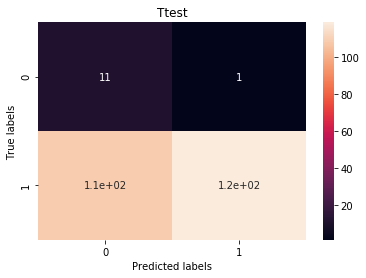

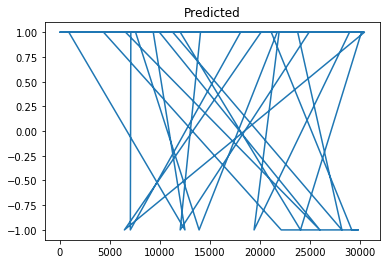

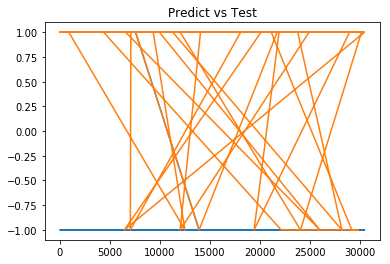

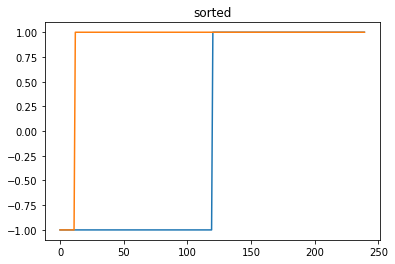

Accuracy: 0.5416666666666666
F1 score: 0.6839080459770115
precision:  0.9916666666666667
recall:  0.5219298245614035
specificity:  0.9166666666666666
ROC_AUC_Score:  0.5416666666666667
[[ 11 109]
 [  1 119]]
              precision    recall  f1-score   support

          -1       0.92      0.09      0.17       120
           1       0.52      0.99      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.72      0.54      0.43       240
weighted avg       0.72      0.54      0.43       240

End of training:  9
[ 0.40695351  0.00943407  1.39615943  0.56412145  0.10486538 -2.38002131
 -0.47662365  0.81248679 -0.32793488]


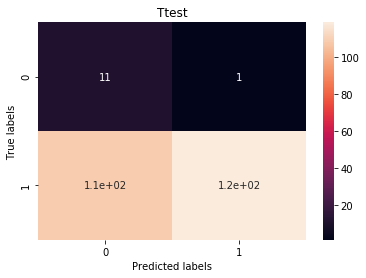

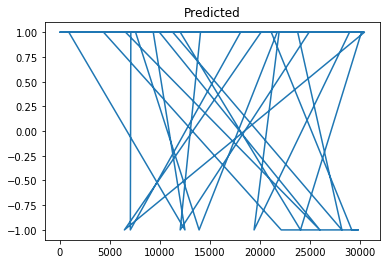

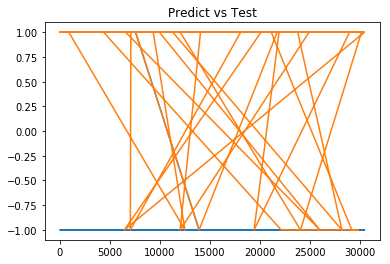

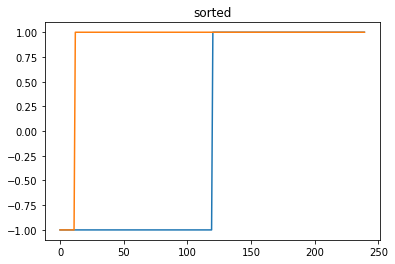

Accuracy: 0.5416666666666666
F1 score: 0.6839080459770115
precision:  0.9916666666666667
recall:  0.5219298245614035
specificity:  0.9166666666666666
ROC_AUC_Score:  0.5416666666666667
[[ 11 109]
 [  1 119]]
              precision    recall  f1-score   support

          -1       0.92      0.09      0.17       120
           1       0.52      0.99      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.72      0.54      0.43       240
weighted avg       0.72      0.54      0.43       240

End of training:  9
[ 0.54260468  0.01257876  1.8615459   0.75216193  0.1398205  -3.17336175
 -0.63549821  1.08331572 -0.43724651]


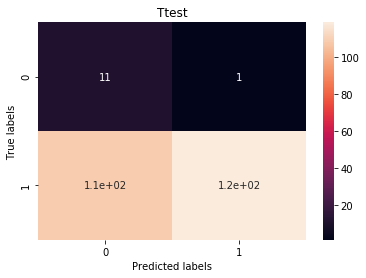

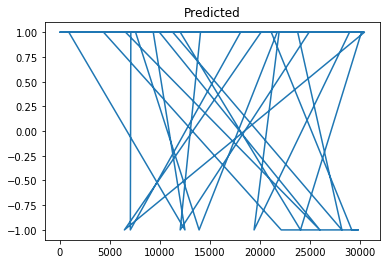

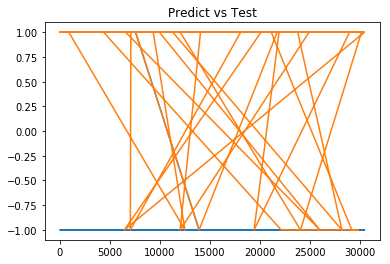

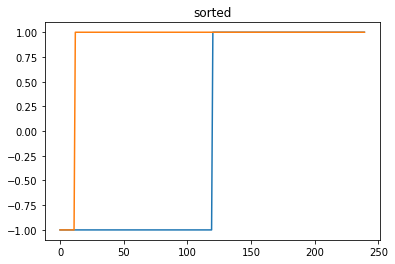

Accuracy: 0.5416666666666666
F1 score: 0.6839080459770115
precision:  0.9916666666666667
recall:  0.5219298245614035
specificity:  0.9166666666666666
ROC_AUC_Score:  0.5416666666666667
[[ 11 109]
 [  1 119]]
              precision    recall  f1-score   support

          -1       0.92      0.09      0.17       120
           1       0.52      0.99      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.72      0.54      0.43       240
weighted avg       0.72      0.54      0.43       240

End of training:  9
[ 0.67825585  0.01572345  2.32693238  0.94020242  0.17477563 -3.96670218
 -0.79437276  1.35414465 -0.54655814]


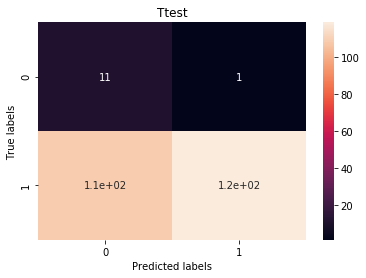

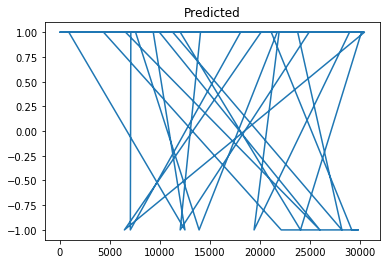

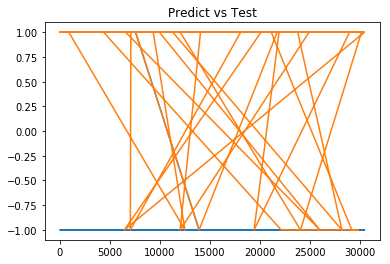

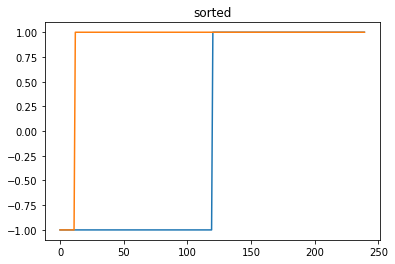

Accuracy: 0.5416666666666666
F1 score: 0.6839080459770115
precision:  0.9916666666666667
recall:  0.5219298245614035
specificity:  0.9166666666666666
ROC_AUC_Score:  0.5416666666666667
[[ 11 109]
 [  1 119]]
              precision    recall  f1-score   support

          -1       0.92      0.09      0.17       120
           1       0.52      0.99      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.72      0.54      0.43       240
weighted avg       0.72      0.54      0.43       240



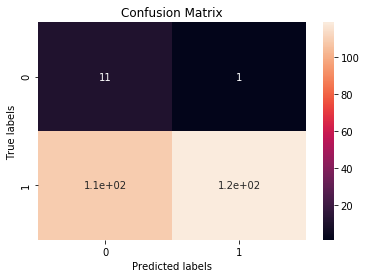

In [ ]:
for alpha in (0.1,0.2,0.3,0.4,0.5):
    X = Xtrain.values
    T = np.array(Ttrain)
    p = Pocket_Algorithm(alpha, 10)
    p.train(X, T)
    Predict=p.use(Xtest)
    plt.title("Ttest")
    plt.plot(Ttest)
    plt.show()
    plt.title("Predicted")
    plt.plot(Predict)
    plt.show()
    plt.title("Predict vs Test")
    plt.plot(Ttest)
    plt.plot(Predict)
    plt.show()
    plt.title("sorted")
    plt.plot(np.sort(Ttest))
    plt.plot(np.sort(Predict))
    plt.show()
    cf=confusion_matrix(Predict, Ttest)
    TP=cf[1][1]
    TN=cf[0][0]
    FN=cf[1][0]
    FP=cf[0][1]
    print('Accuracy:', accuracy_score(Ttest,Predict))
    print('F1 score:', f1_score(Ttest,Predict))
    precision=(TP/(TP+FP))
    print('precision: ', precision)
    recall = (TP/(TP+FN))
    print('recall: ', recall)
    specificity=TN/(TN+FP)
    print('specificity: ', specificity)
    roc_score = roc_auc_score(Ttest, Predict)
    print('ROC_AUC_Score: ',roc_score )
    ax= plt.subplot()
    sns.heatmap(cf, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix');
    cf=confusion_matrix(Ttest, Predict)
    print(cf)
    print(classification_report(Ttest,Predict))

In the above experiment I have used all the feature variables against one target variable which is income using the same dataset as before of size 1200. I have twisted the experiment by feeding in different learning rates and keeping the number of iterations constant at 10. We can see from the results that changing learning rate had no impact on the result. In all the cases I received Accuracy of 0.54, F1 score of 0.68, Precision of 0.99, Recall of 0.52, specificity of 0.91 and ROC score of 0.54. We can see that the algorithm has performed quite poorly with a very low accuray score and learning rate had no effect on the result.

## Experiment 3: All feature variables with learning rate 0.1 and differing maxiter

End of training:  4
[ 0.21380001 -0.10534713  0.22128271  0.00558777 -0.06053823 -0.53735654
 -0.28338489  0.3220979   0.1367128 ]


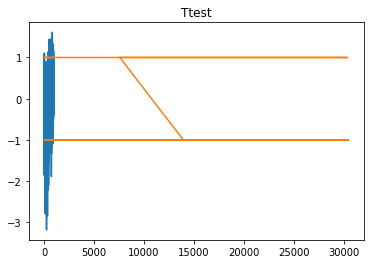

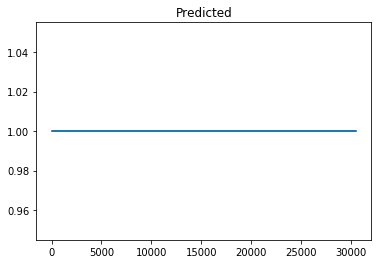

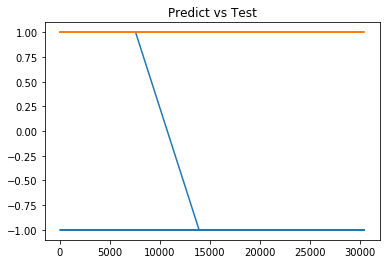

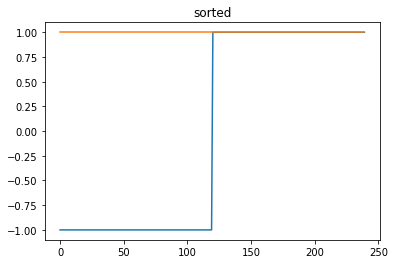

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 120]
 [  0 120]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       120
           1       0.50      1.00      0.67       120

   micro avg       0.50      0.50      0.50       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.25      0.50      0.33       240



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


End of training:  9
[ 0.13565117  0.00314469  0.46538648  0.18804048  0.03495513 -0.79334044
 -0.15887455  0.27082893 -0.10931163]


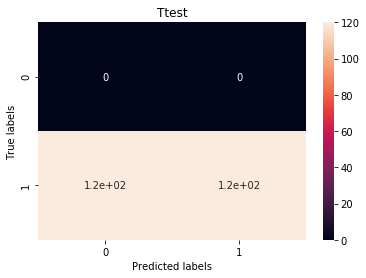

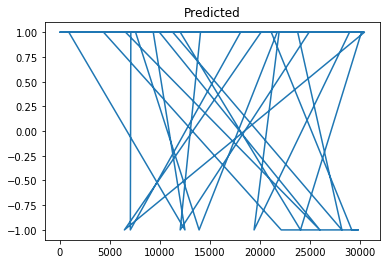

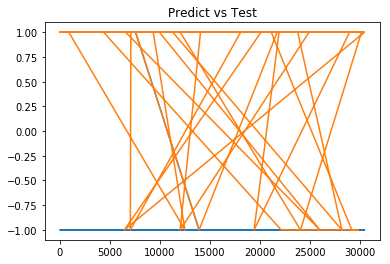

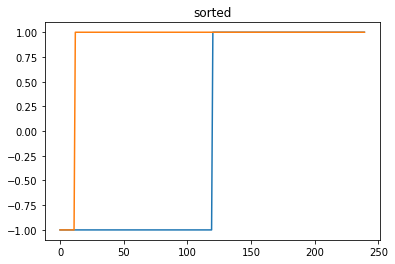

Accuracy: 0.5416666666666666
F1 score: 0.6839080459770115
precision:  0.9916666666666667
recall:  0.5219298245614035
specificity:  0.9166666666666666
ROC_AUC_Score:  0.5416666666666667
[[ 11 109]
 [  1 119]]
              precision    recall  f1-score   support

          -1       0.92      0.09      0.17       120
           1       0.52      0.99      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.72      0.54      0.43       240
weighted avg       0.72      0.54      0.43       240

End of training:  49
[ 0.1571209  -0.07232788  0.27629775 -0.04907516 -0.07446962 -0.61072772
  0.0738431   0.31864932  0.06418029]


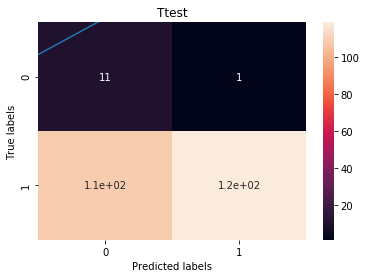

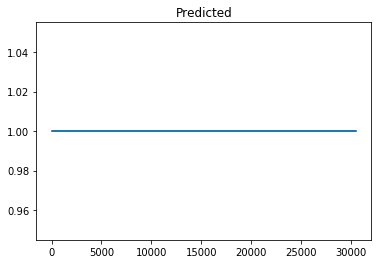

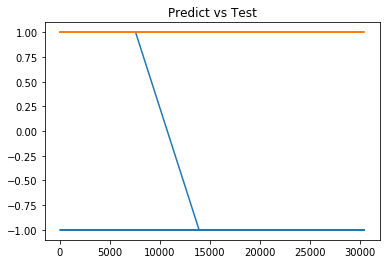

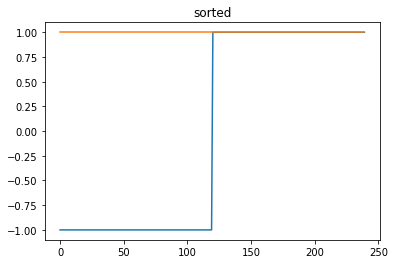

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 120]
 [  0 120]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       120
           1       0.50      1.00      0.67       120

   micro avg       0.50      0.50      0.50       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.25      0.50      0.33       240



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


End of training:  79
[ 0.16869546 -0.01886814  0.27222256  0.03789963 -0.12867539 -0.53199928
  0.23719299  0.43498161 -0.08557371]


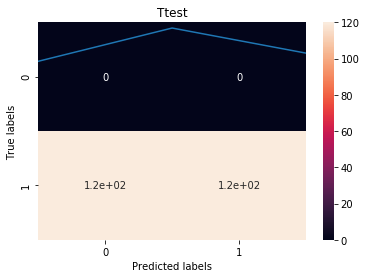

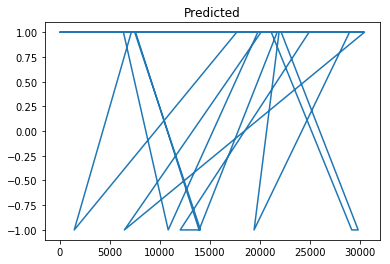

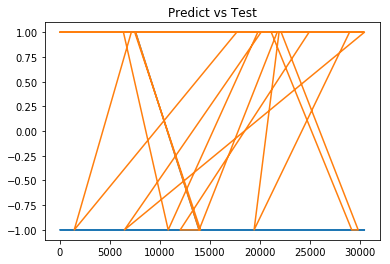

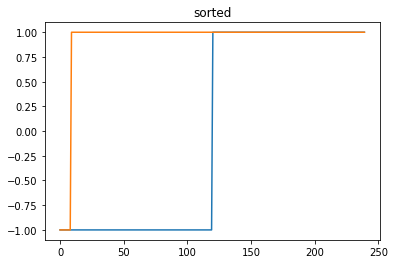

Accuracy: 0.5375
F1 score: 0.6837606837606837
precision:  1.0
recall:  0.5194805194805194
specificity:  1.0
ROC_AUC_Score:  0.5375
[[  9 111]
 [  0 120]]
              precision    recall  f1-score   support

          -1       1.00      0.07      0.14       120
           1       0.52      1.00      0.68       120

   micro avg       0.54      0.54      0.54       240
   macro avg       0.76      0.54      0.41       240
weighted avg       0.76      0.54      0.41       240

End of training:  99
[ 0.12203501 -0.26415399  0.32927519  0.01749214 -0.03444853 -0.61678376
 -0.0242947   0.26301214  0.15414991]


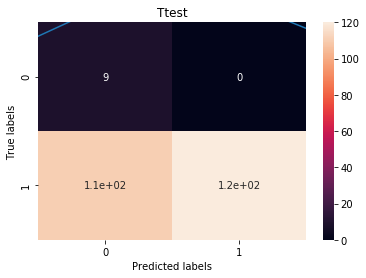

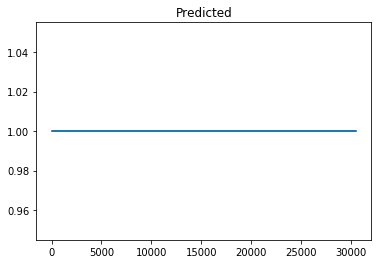

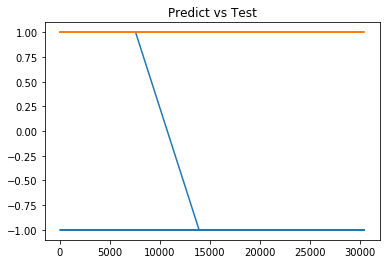

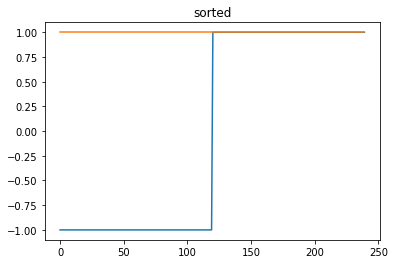

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 120]
 [  0 120]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       120
           1       0.50      1.00      0.67       120

   micro avg       0.50      0.50      0.50       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.25      0.50      0.33       240



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


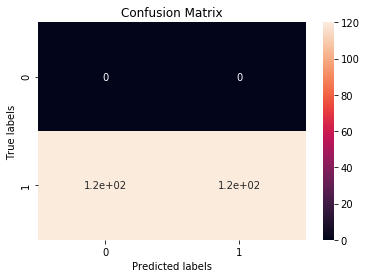

In [ ]:
for maxiter in (5,10,50,80,100):
    X = Xtrain.values
    T = np.array(Ttrain)
    p = Pocket_Algorithm(0.1, maxiter)
    p.train(X, T)
    Predict=p.use(Xtest)
    plt.title("Ttest")
    plt.plot(Ttest)
    plt.show()
    plt.title("Predicted")
    plt.plot(Predict)
    plt.show()
    plt.title("Predict vs Test")
    plt.plot(Ttest)
    plt.plot(Predict)
    plt.show()
    plt.title("sorted")
    plt.plot(np.sort(Ttest))
    plt.plot(np.sort(Predict))
    plt.show()
    cf=confusion_matrix(Predict, Ttest)
    TP=cf[1][1]
    TN=cf[0][0]
    FN=cf[1][0]
    FP=cf[0][1]
    print('Accuracy:', accuracy_score(Ttest,Predict))
    print('F1 score:', f1_score(Ttest,Predict))
    precision=(TP/(TP+FP))
    print('precision: ', precision)
    recall = (TP/(TP+FN))
    print('recall: ', recall)
    specificity=TN/(TN+FP)
    print('specificity: ', specificity)
    roc_score = roc_auc_score(Ttest, Predict)
    print('ROC_AUC_Score: ',roc_score )
    ax= plt.subplot()
    sns.heatmap(cf, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix');
    cf=confusion_matrix(Ttest, Predict)
    print(cf)
    print(classification_report(Ttest,Predict))

End of training:  9
[ 0.1892221  -0.05325227  0.12598497 -0.01476135 -0.18484805 -0.75733078
  0.04642263  0.27995609  0.25720032]
[-1  1]


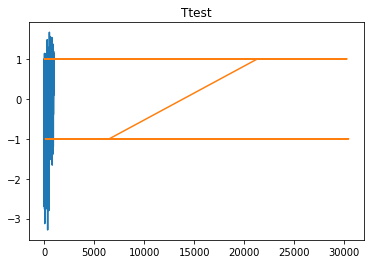

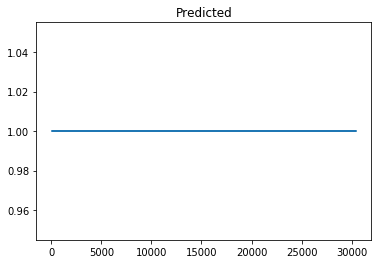

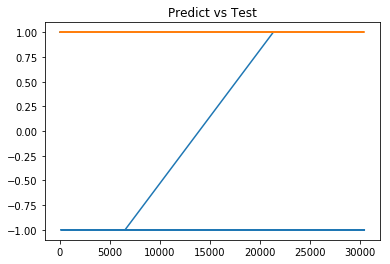

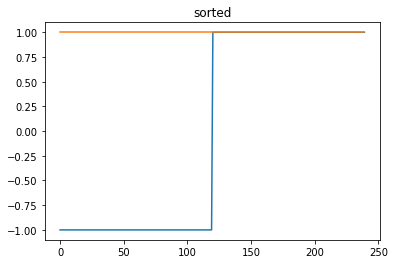

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 120]
 [  0 120]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       120
           1       0.50      1.00      0.67       120

   micro avg       0.50      0.50      0.50       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.25      0.50      0.33       240



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


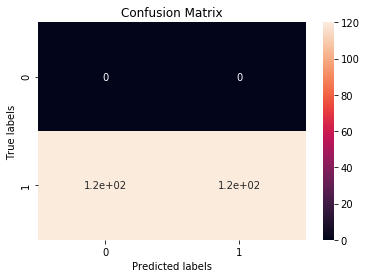

In [92]:
X = Xtrain
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1, 10)
p.train(X, T)
print(np.unique(Ttest))
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))

In the above experiment I have used all the feature variables against one target variable which is income using the same dataset as before of size 1200. I have twisted the experiment by feeding in different number of iterations and keeping the learning rate constant at 0.1. We can see from the results that changing number of iterations had a lot of impact on the result. In some of the cases I received Accuracy of 0.54, F1 score of 0.68, Precision of 0.99, Recall of 0.52, specificity of 0.91 and ROC score of 0.54. While in some I received Accuracy of 0.5, F1 score of 0.66, Precision of 1.0, Recall of 0.5, specificity of nan and ROC score of 0.5. It is noticeable that incertain conditions the model did not predict one of the classes at all.  We can see that the algorithm has performed quite poorly with a very low accuray score and number of iterations has also brought changes in results.

## Experiment 4: Three feature variables with learning rate 0.1 and maxiter 10

In [ ]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['workclass','education','occupation']]
Xtest = T[['workclass','education','occupation']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 3)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 3)
The Shape of T test data set is (400, 1)


End of training:  49
[0.03452016 0.18752944 0.07125583]


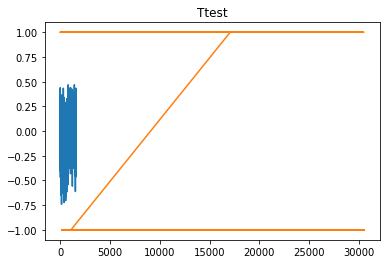

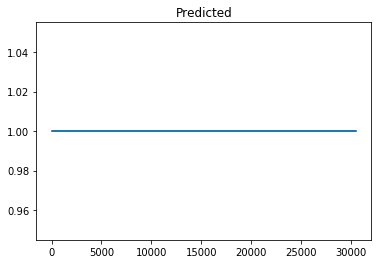

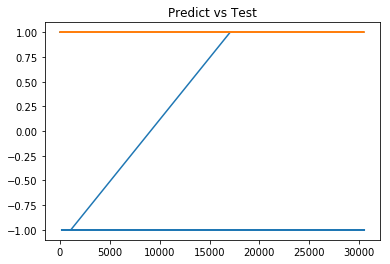

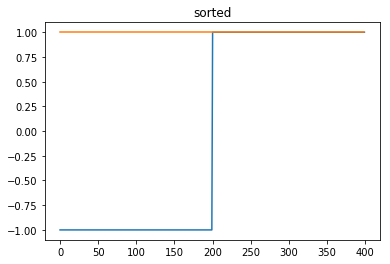

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 200]
 [  0 200]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       200
           1       0.50      1.00      0.67       200

   micro avg       0.50      0.50      0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


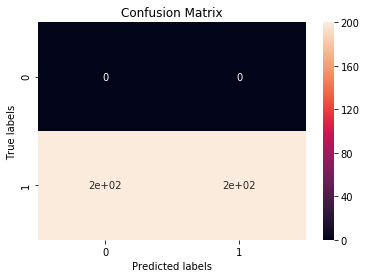

In [ ]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1,10)
p.train(X, T)
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))


In the above experiment I have used the three most correlated variables according to the correlation matrix that were workclass, occupation and education. I have used a dataset of size 2000 in total and partitioned it in 8:2 ratio. I have kept the learning rate 0.1 and number of iterations as 50. It can be seen that the algorithm has produced very weird results as it has not predicted one of the two classes at all. I received Accuracy of 0.5, F1 score of 0.66, Precision of 1.0, Recall of 0.5, specificity of nan and ROC score of 0.5. In this case as well the algorithm has performed poorly. And it is quite different to happen that the algorithm when fed with equal amounts of inputs of both the classes has not predicted on of the classes at all.

## Experiment 5: All feature values with alpha 0.1 and maxiter 50 with variables size dataset

In [145]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


End of training:  9
[ 0.112267   -0.10692881  0.20710673 -0.31274239  0.2159034  -0.61529618
  0.20707458  0.07343419 -0.10532622]


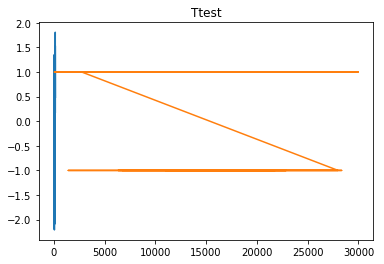

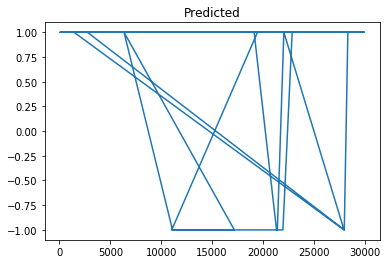

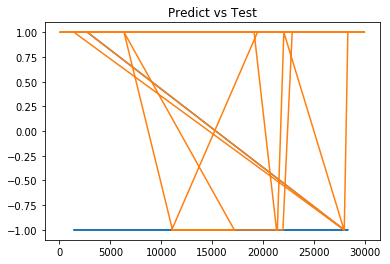

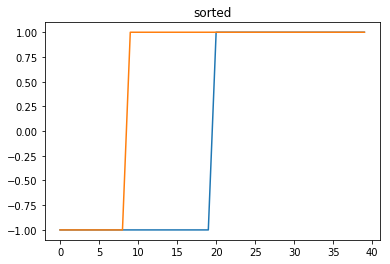

Accuracy: 0.725
F1 score: 0.7843137254901961
precision:  1.0
recall:  0.6451612903225806
specificity:  1.0
ROC_AUC_Score:  0.725
[[ 9 11]
 [ 0 20]]
              precision    recall  f1-score   support

          -1       1.00      0.45      0.62        20
           1       0.65      1.00      0.78        20

   micro avg       0.72      0.72      0.73        40
   macro avg       0.82      0.72      0.70        40
weighted avg       0.82      0.72      0.70        40



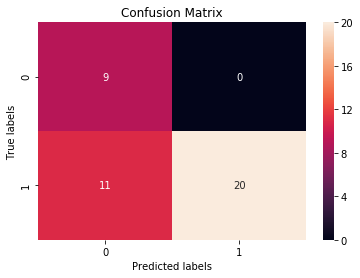

In [146]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1,10)
p.train(X, T)
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))


In [147]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=500)
T2 = T2.sample(n=500)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (800, 9)
The Shape of T train data set is (800, 1)
The Shape of X test data set is (200, 9)
The Shape of T test data set is (200, 1)


End of training:  9
[ 0.415279    0.11093797  0.39485436 -0.3703841   0.00346133 -0.44077618
  0.143727    0.24621881  0.18022513]


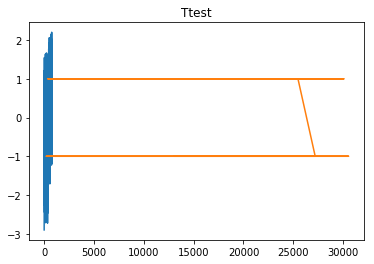

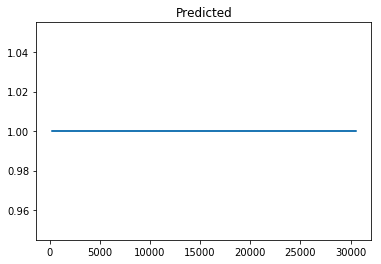

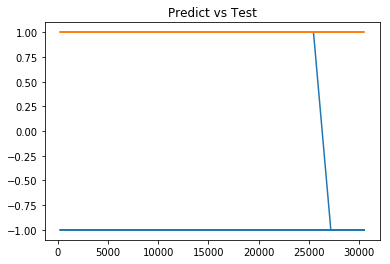

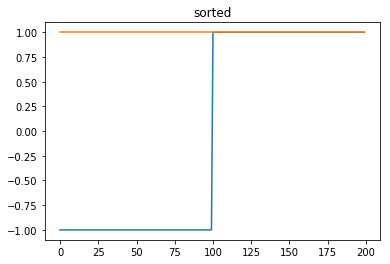

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 100]
 [  0 100]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

   micro avg       0.50      0.50      0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


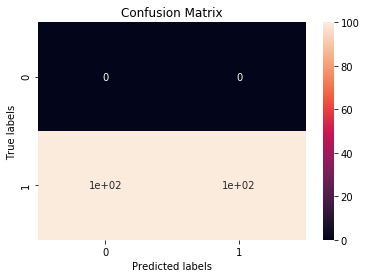

In [148]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1,10)
p.train(X, T)
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))


In [149]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


End of training:  9
[ 0.05137975 -0.03023019  0.32961322  0.08720191  0.00982236 -0.63401101
 -0.01521292  0.32655193  0.30120392]


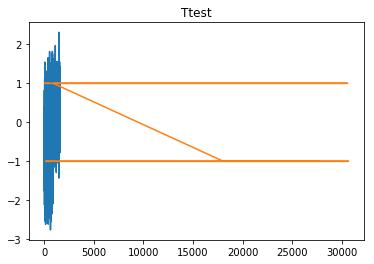

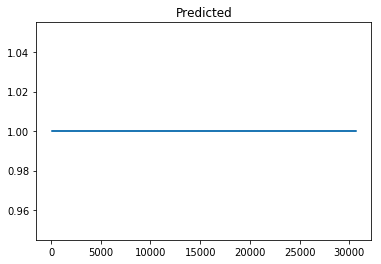

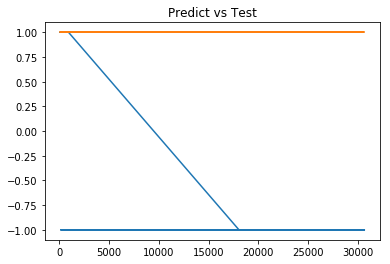

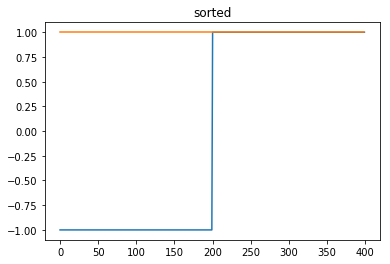

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 200]
 [  0 200]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       200
           1       0.50      1.00      0.67       200

   micro avg       0.50      0.50      0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


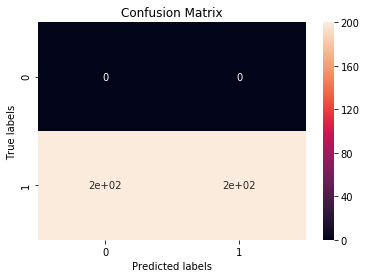

In [150]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1,10)
p.train(X, T)
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))


In [151]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1500)
T2 = T2.sample(n=1500)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (2400, 9)
The Shape of T train data set is (2400, 1)
The Shape of X test data set is (600, 9)
The Shape of T test data set is (600, 1)


End of training:  9
[ 0.21678205  0.01165415  0.18244915  0.10498449  0.04253337 -0.58689486
  0.36844756 -0.09445775  0.4246074 ]


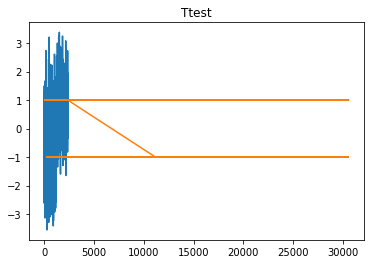

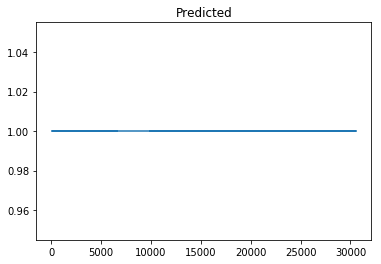

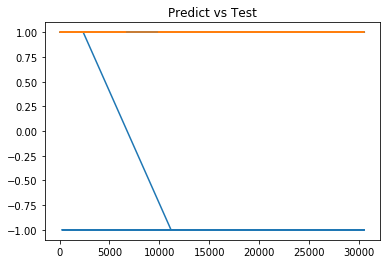

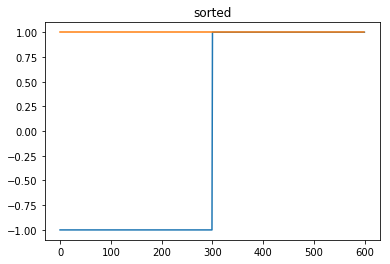

Accuracy: 0.5
F1 score: 0.6666666666666666
precision:  1.0
recall:  0.5
specificity:  nan
ROC_AUC_Score:  0.5
[[  0 300]
 [  0 300]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       300
           1       0.50      1.00      0.67       300

   micro avg       0.50      0.50      0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


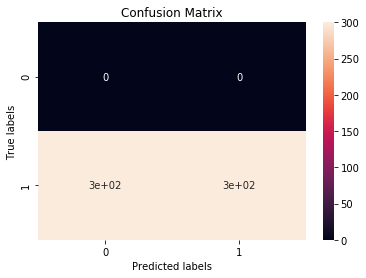

In [152]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1,10)
p.train(X, T)
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))


In [153]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=2000)
T2 = T2.sample(n=2000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (3200, 9)
The Shape of T train data set is (3200, 1)
The Shape of X test data set is (800, 9)
The Shape of T test data set is (800, 1)


End of training:  9
[-0.13894425 -0.30665109  0.30985497  0.11323776  0.21192982 -0.36449111
  0.43320597  0.13636584  0.31641628]


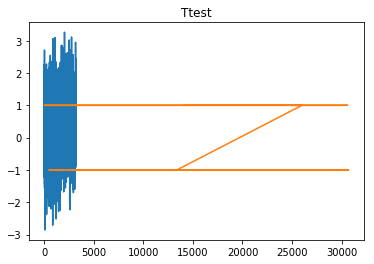

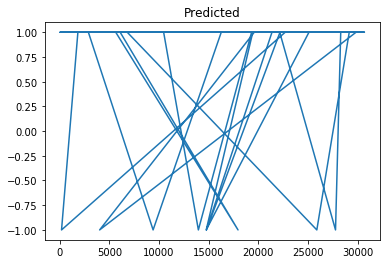

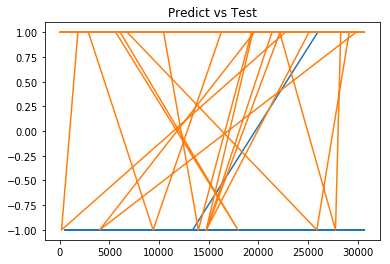

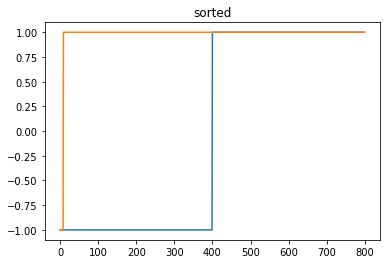

Accuracy: 0.50375
F1 score: 0.6666666666666667
precision:  0.9925
recall:  0.5018963337547409
specificity:  0.6666666666666666
ROC_AUC_Score:  0.50375
[[  6 394]
 [  3 397]]
              precision    recall  f1-score   support

          -1       0.67      0.01      0.03       400
           1       0.50      0.99      0.67       400

   micro avg       0.50      0.50      0.50       800
   macro avg       0.58      0.50      0.35       800
weighted avg       0.58      0.50      0.35       800



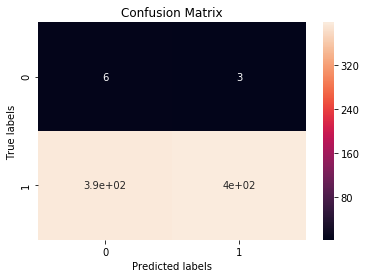

In [154]:
X = Xtrain.values
T = np.array(Ttrain)
p = Pocket_Algorithm(0.1,10)
p.train(X, T)
Predict=p.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Predict))
plt.show()
cf=confusion_matrix(Predict, Ttest)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Predict))
print('F1 score:', f1_score(Ttest,Predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, Predict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Predict)
print(cf)
print(classification_report(Ttest,Predict))


For the above experiment I have used datasets of different sizes and have used all the feature variables against one target variable which is income. I have kept the learning rate as 0.1 and number of iterations as 50 in all cases. Unfortunately my algorithm did not perform as expected for this experiment and predicted values that led to only 50% accuracy giving a specificity value of nan. Only for the first case it gave a good result.

### Experiments for QDA

## Experiment 1: All feature variables

In [11]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


On test data

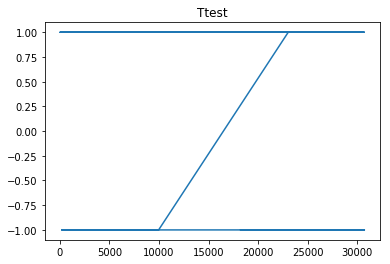

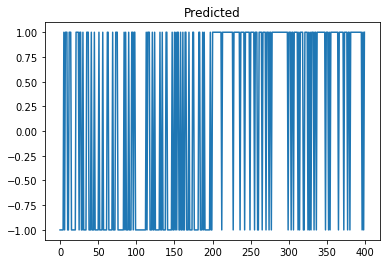

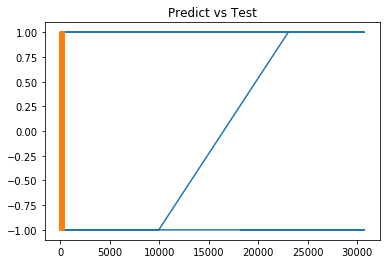

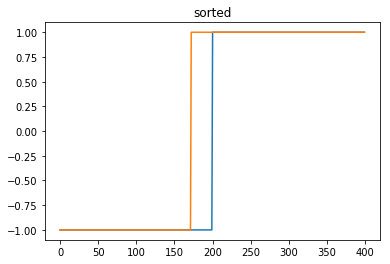

Accuracy: 0.765
F1 score: 0.7803738317757009
precision:  0.7324561403508771
recall:  0.835
specificity:  0.695
ROC_AUC_Score:  0.765
[[139  61]
 [ 33 167]]
              precision    recall  f1-score   support

          -1       0.81      0.69      0.75       200
           1       0.73      0.83      0.78       200

   micro avg       0.77      0.77      0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.77      0.76       400



Text(0.5, 1.0, 'QDA Discriminant Functions')

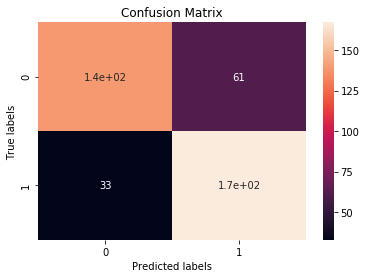

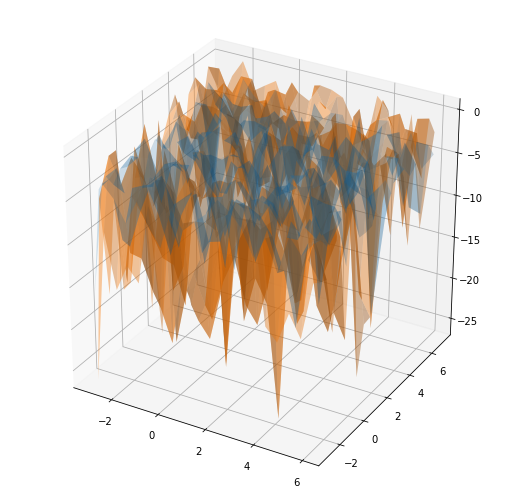

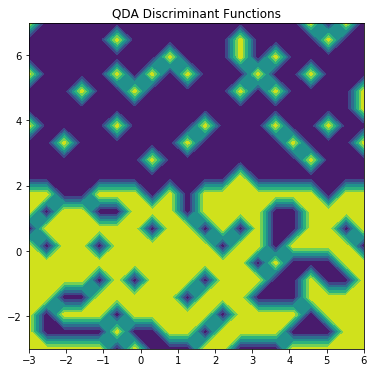

In [12]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X,T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))
Xtest = np.array(Xtest)
p,d1_p,d2_p = qda.use(Xtest)
xs, ys = np.meshgrid(np.linspace(-3,6, 20), np.linspace(-3,7, 20))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")
ax.plot_surface(xs, ys, (d1_p.reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, (d2_p.reshape(xs.shape)), alpha=0.4)
plt.title("QDA Discriminant Functions")

In the above experiment I have implemented the QDA algorithm using all feature variables and one target variable and keeping the dataset size as 2000. It has given me accuracy of 0.76, F1 score of 0.78, precision of 0.73, recall of 0.83, specificity of 0.695 and ROC score of 0.76. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 139 values of first class and 167 values of the second class perfectly.

On train data

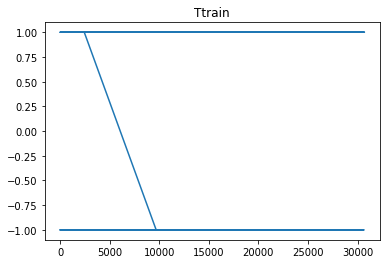

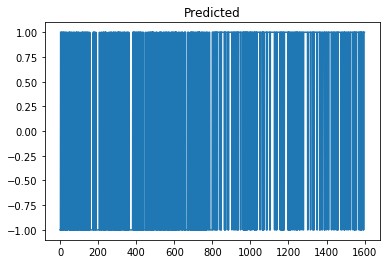

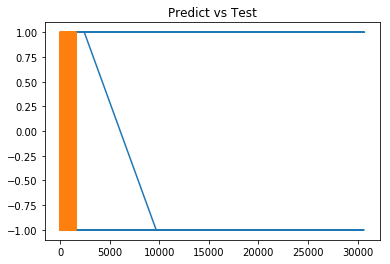

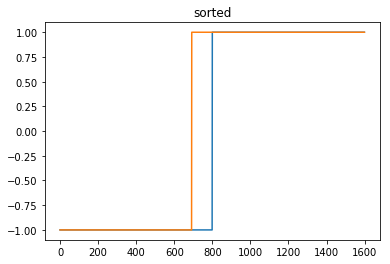

Accuracy: 0.76125
F1 score: 0.7763466042154568
precision:  0.7301762114537445
recall:  0.82875
specificity:  0.69375
ROC_AUC_Score:  0.7612499999999999
[[555 245]
 [137 663]]
              precision    recall  f1-score   support

          -1       0.80      0.69      0.74       800
           1       0.73      0.83      0.78       800

   micro avg       0.76      0.76      0.76      1600
   macro avg       0.77      0.76      0.76      1600
weighted avg       0.77      0.76      0.76      1600



Text(0.5, 1.0, 'QDA Discriminant Functions')

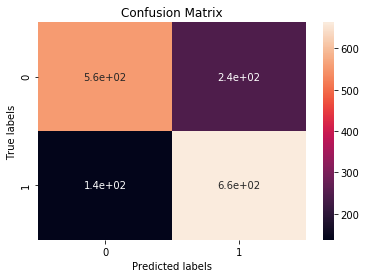

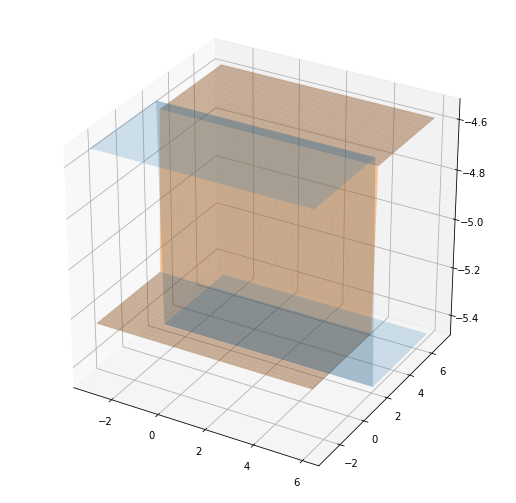

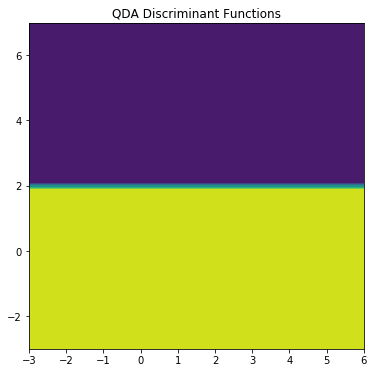

In [13]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X,T)
qpredict,d1,d2=qda.use(Xtrain)
plt.title("Ttrain")
plt.plot(Ttrain)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttrain)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttrain))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttrain, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttrain,qpredict))
print('F1 score:', f1_score(Ttrain,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttrain, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttrain, qpredict)
print(cf)
print(classification_report(Ttrain,qpredict))
Ttrain = np.array(Ttrain)
p,d1_p,d2_p = qda.use(Ttrain)
xs, ys = np.meshgrid(np.linspace(-3,6, 40), np.linspace(-3,7, 40))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")
ax.plot_surface(xs, ys, (d1_p.reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, (d2_p.reshape(xs.shape)), alpha=0.4)
plt.title("QDA Discriminant Functions")

For this experiment I have repeated the experiment above but to test train and test accuracies, I have performed the experiment using train dataset. I have implemented the QDA algorithm using all feature variables and one target variable and keeping the dataset size as 2000. It has given me accuracy of 0.76, F1 score of 0.78, precision of 0.73, recall of 0.83, specificity of 0.69 and ROC score of 0.76. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 555 values of first class and 663 values of the second class perfectly. Thus it gives similar accuracy and similar values of evaluation metrices for train and test datasets.

## Experiment 2: Three feature variables

In [14]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['workclass','education','occupation']]
Xtest = T[['workclass','education','occupation']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 3)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 3)
The Shape of T test data set is (400, 1)


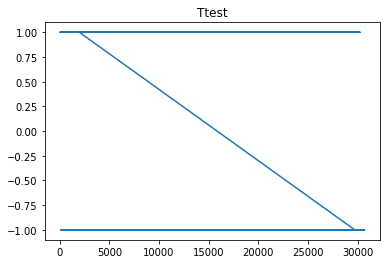

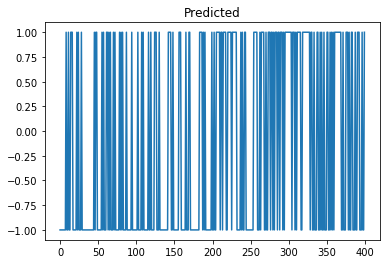

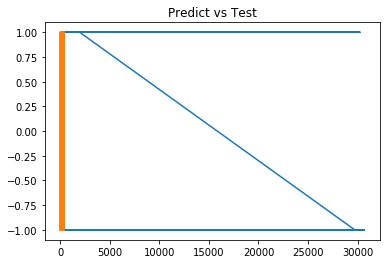

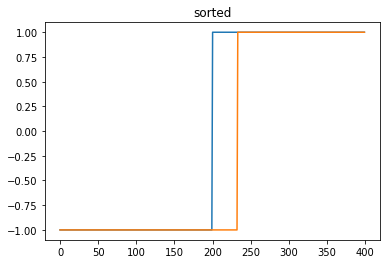

Accuracy: 0.6625
F1 score: 0.6321525885558582
precision:  0.6946107784431138
recall:  0.58
specificity:  0.745
ROC_AUC_Score:  0.6625
[[149  51]
 [ 84 116]]
              precision    recall  f1-score   support

          -1       0.64      0.74      0.69       200
           1       0.69      0.58      0.63       200

   micro avg       0.66      0.66      0.66       400
   macro avg       0.67      0.66      0.66       400
weighted avg       0.67      0.66      0.66       400



Text(0.5, 1.0, 'QDA Discriminant Functions')

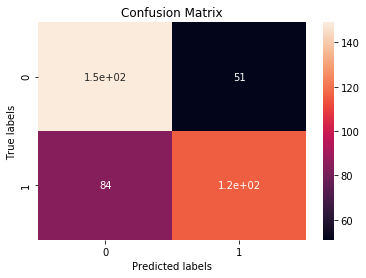

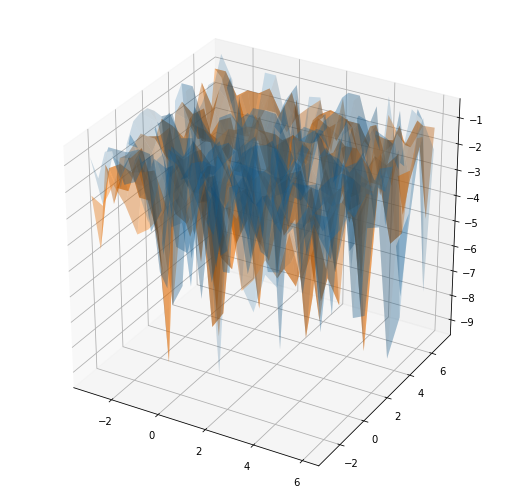

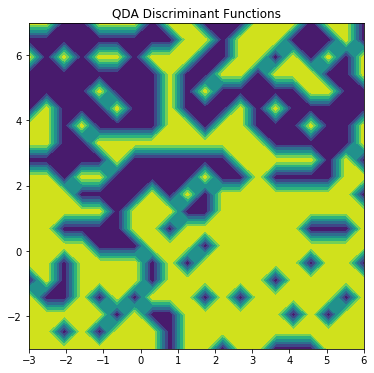

In [15]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X, T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))
Xtest = np.array(Xtest)
p,d1_p,d2_p = qda.use(Xtest)
xs, ys = np.meshgrid(np.linspace(-3,6, 20), np.linspace(-3,7, 20))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")
ax.plot_surface(xs, ys, (d1_p.reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, (d2_p.reshape(xs.shape)), alpha=0.4)
plt.title("QDA Discriminant Functions")

In the above experiment I have implemented the QDA algorithm using three of the most correlated feature variables that were workplace, occupation and education as described by the correlation matrix and one target variable and keeping the dataset size as 2000. It has given me accuracy of 0.66, F1 score of 0.63, precision of 0.69, recall of 0.58, specificity of 0.74 and ROC score of 0.66. We can see that in comparison to all feature values, it has not performed very well. There might be some difference due to different values being selected from the dataset. But more or less the algorithm will still perform almost in this manner only. Hence it is a good algorithm as it does perfrom fairly well.

## Experiment 3: With variable datasize

In [16]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


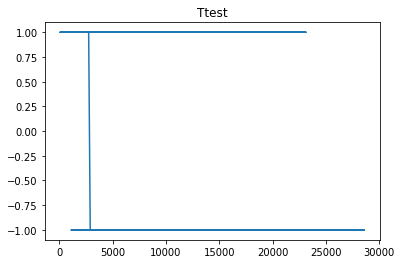

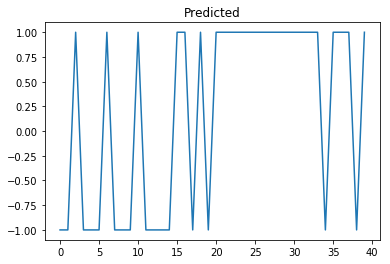

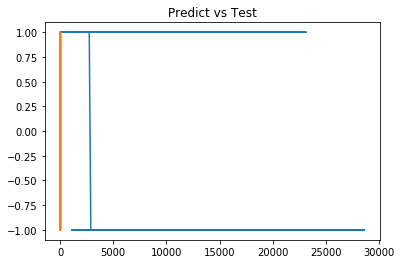

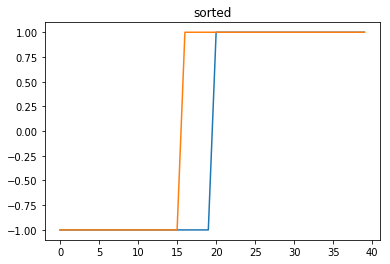

Accuracy: 0.8
F1 score: 0.8181818181818182
precision:  0.75
recall:  0.9
specificity:  0.7
ROC_AUC_Score:  0.7999999999999999
[[14  6]
 [ 2 18]]
              precision    recall  f1-score   support

          -1       0.88      0.70      0.78        20
           1       0.75      0.90      0.82        20

   micro avg       0.80      0.80      0.80        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



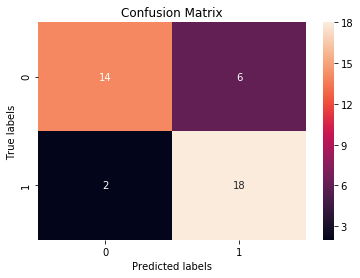

In [17]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X, T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))


In [18]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=200)
T2 = T2.sample(n=200)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (320, 9)
The Shape of T train data set is (320, 1)
The Shape of X test data set is (80, 9)
The Shape of T test data set is (80, 1)


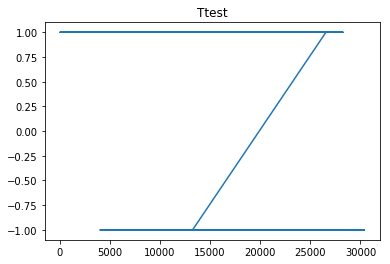

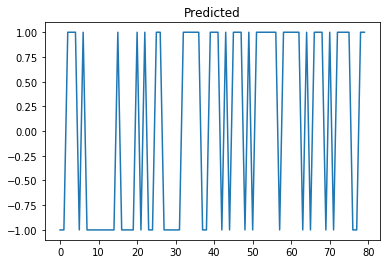

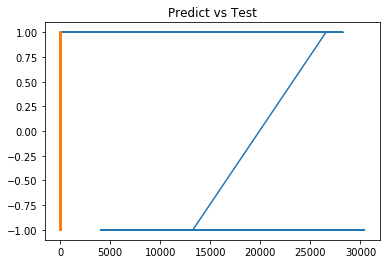

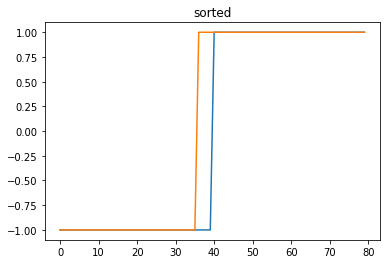

Accuracy: 0.675
F1 score: 0.6904761904761905
precision:  0.6590909090909091
recall:  0.725
specificity:  0.625
ROC_AUC_Score:  0.675
[[25 15]
 [11 29]]
              precision    recall  f1-score   support

          -1       0.69      0.62      0.66        40
           1       0.66      0.72      0.69        40

   micro avg       0.68      0.68      0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.67        80



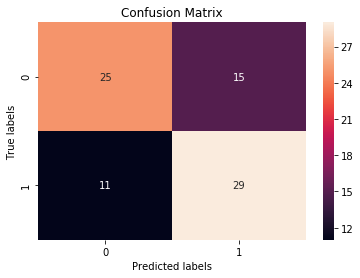

In [19]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X, T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))


In [20]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=500)
T2 = T2.sample(n=500)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (800, 9)
The Shape of T train data set is (800, 1)
The Shape of X test data set is (200, 9)
The Shape of T test data set is (200, 1)


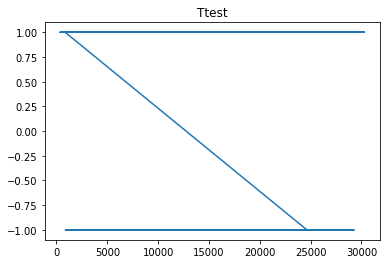

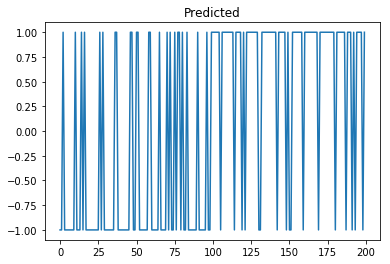

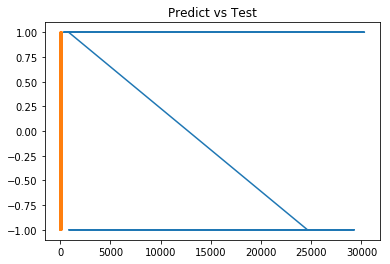

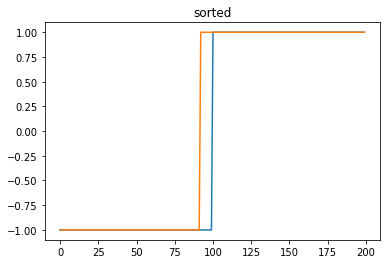

Accuracy: 0.79
F1 score: 0.798076923076923
precision:  0.7685185185185185
recall:  0.83
specificity:  0.75
ROC_AUC_Score:  0.79
[[75 25]
 [17 83]]
              precision    recall  f1-score   support

          -1       0.82      0.75      0.78       100
           1       0.77      0.83      0.80       100

   micro avg       0.79      0.79      0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



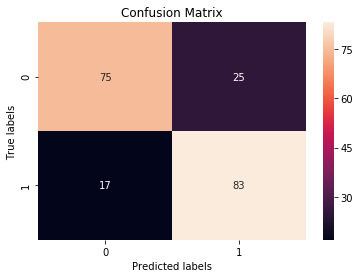

In [21]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X, T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))


In [22]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


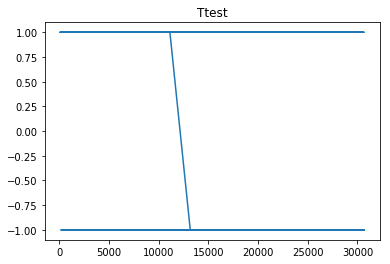

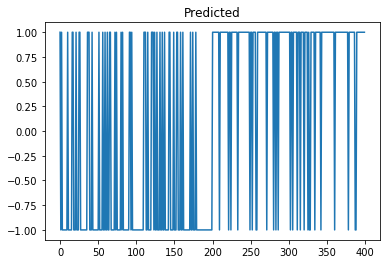

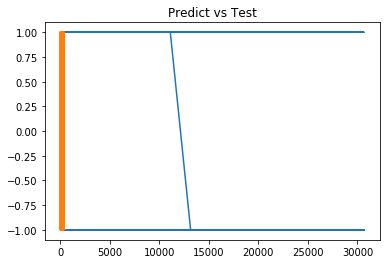

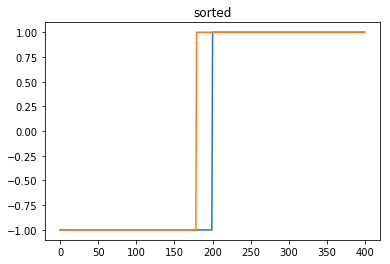

Accuracy: 0.8175
F1 score: 0.826603325415677
precision:  0.7873303167420814
recall:  0.87
specificity:  0.765
ROC_AUC_Score:  0.8175000000000001
[[153  47]
 [ 26 174]]
              precision    recall  f1-score   support

          -1       0.85      0.77      0.81       200
           1       0.79      0.87      0.83       200

   micro avg       0.82      0.82      0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



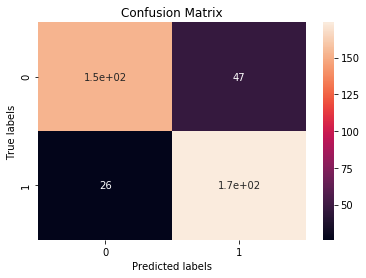

In [23]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X, T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))


In [24]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=2000)
T2 = T2.sample(n=2000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (3200, 9)
The Shape of T train data set is (3200, 1)
The Shape of X test data set is (800, 9)
The Shape of T test data set is (800, 1)


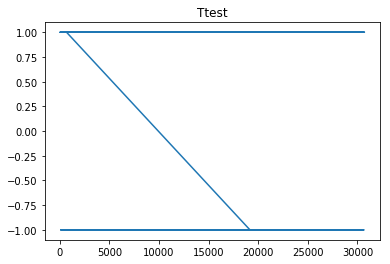

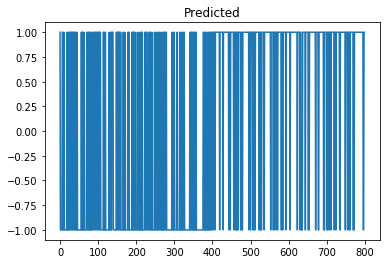

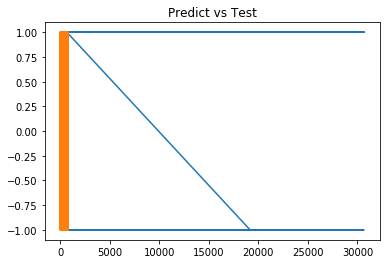

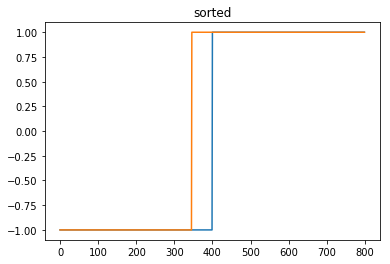

Accuracy: 0.77
F1 score: 0.7845433255269321
precision:  0.737885462555066
recall:  0.8375
specificity:  0.7025
ROC_AUC_Score:  0.77
[[281 119]
 [ 65 335]]
              precision    recall  f1-score   support

          -1       0.81      0.70      0.75       400
           1       0.74      0.84      0.78       400

   micro avg       0.77      0.77      0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800



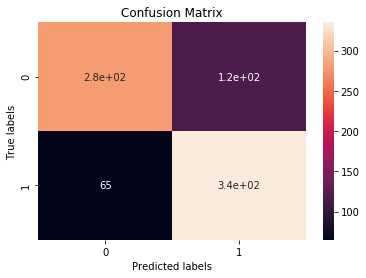

In [25]:
X = Xtrain.values
T = np.array(Ttrain)
qda=QDA_Algorithm()
qda.train(X, T)
qpredict,d1,d2=qda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(qpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(qpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(qpredict))
plt.show()
cf=confusion_matrix(Ttest, qpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,qpredict))
print('F1 score:', f1_score(Ttest,qpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, qpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, qpredict)
print(cf)
print(classification_report(Ttest,qpredict))


For my final experiment I have used variable dataset sizes to implement QDA algorithm and see the effect of dataset size on the algorithm's performance. I have used all the feature variables against one target variable which is income. In most cases the accuracy has been around 0.8. Thus the algorithm performs extremely well for any size of dataset. This is a very efficient algorithm because through all the eperiments we can see that in almost all circumstances the algorithm has performed very well.

### Experiments for LDA

## Experiment 1: With all feature values

In [26]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


On test data

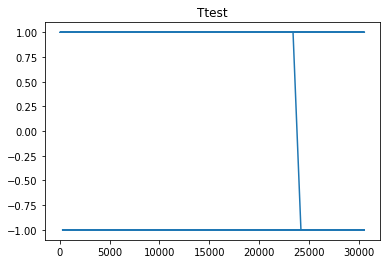

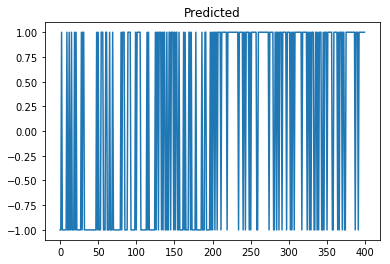

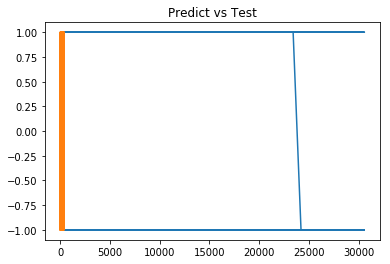

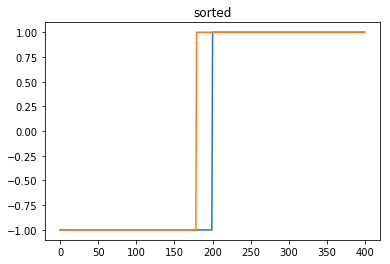

Accuracy: 0.7325
F1 score: 0.7458432304038004
precision:  0.7104072398190046
recall:  0.785
specificity:  0.68
ROC_AUC_Score:  0.7325
[[136  64]
 [ 43 157]]
              precision    recall  f1-score   support

          -1       0.76      0.68      0.72       200
           1       0.71      0.79      0.75       200

   micro avg       0.73      0.73      0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



Text(0.5, 1.0, 'LDA Discriminant Functions')

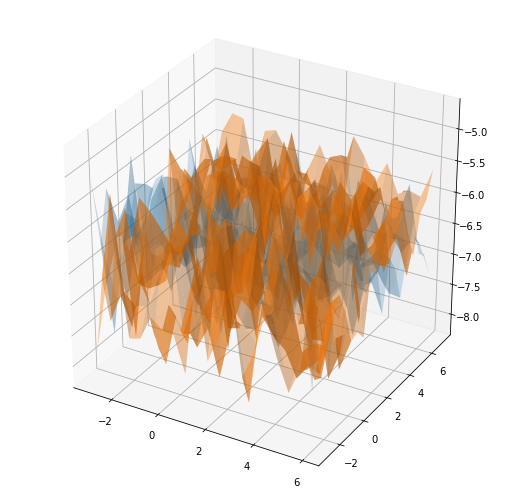

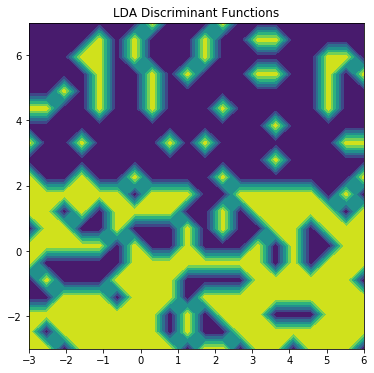

In [27]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
Xtest = np.array(Xtest)
p,d1_p,d2_p = lda.use(Xtest)
xs, ys = np.meshgrid(np.linspace(-3,6, 20), np.linspace(-3,7, 20))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")
ax.plot_surface(xs, ys, (d1_p.reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, (d2_p.reshape(xs.shape)), alpha=0.4)
plt.title("LDA Discriminant Functions")

In the above experiment I have implemented the LDA algorithm using all feature variables and one target variable and keeping the dataset size as 2000. It has given me accuracy of 0.73, F1 score of 0.74, precision of 0.71, recall of 0.78, specificity of 0.68 and ROC score of 0.73. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 136 values of first class and 157 values of the second class perfectly. But it still did not perform as well as the QDA algorithm. QDA performs much better than LDA.

On train data

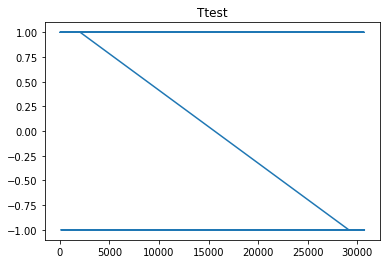

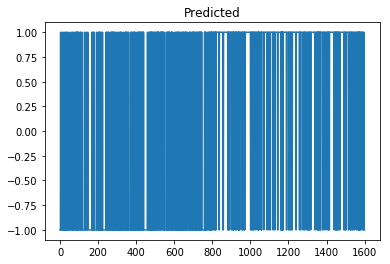

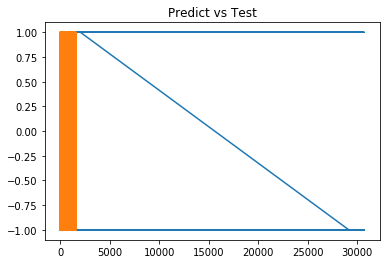

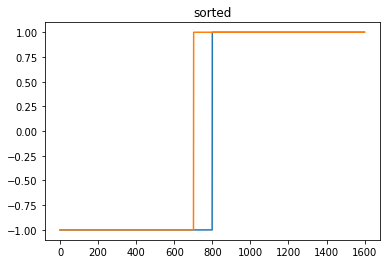

Accuracy: 0.78875
F1 score: 0.800942285041225
precision:  0.7572383073496659
recall:  0.85
specificity:  0.7275
ROC_AUC_Score:  0.7887500000000001
[[582 218]
 [120 680]]
              precision    recall  f1-score   support

          -1       0.83      0.73      0.77       800
           1       0.76      0.85      0.80       800

   micro avg       0.79      0.79      0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



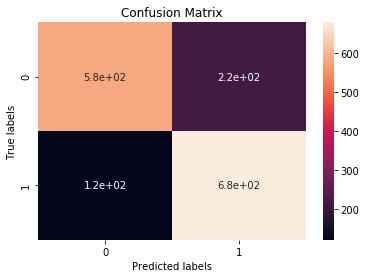

In [28]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtrain)
plt.title("Ttest")
plt.plot(Ttrain)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttrain)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttrain))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttrain, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttrain,lpredict))
print('F1 score:', f1_score(Ttrain,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttrain, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttrain, lpredict)
print(cf)
print(classification_report(Ttrain,lpredict))


For this experiment I have repeated the experiment above but to test train and test accuracies, I have performed the experiment using train dataset. I have implemented the LDA algorithm using all feature variables and one target variable and keeping the dataset size as 2000. It has given me accuracy of 0.78, F1 score of 0.80, precision of 0.75, recall of 0.85, specificity of 0.72 and ROC score of 0.78. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 582 values of first class and 680 values of the second class perfectly. It has performed drastically better than the experiment on test data.

## Experiment 2: With three feature variables

In [29]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['workclass','education','occupation']]
Xtest = T[['workclass','education','occupation']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 3)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 3)
The Shape of T test data set is (400, 1)


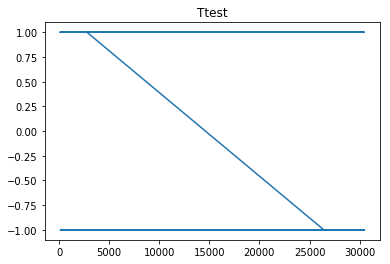

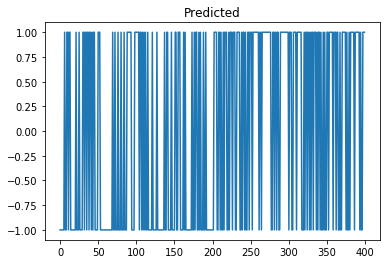

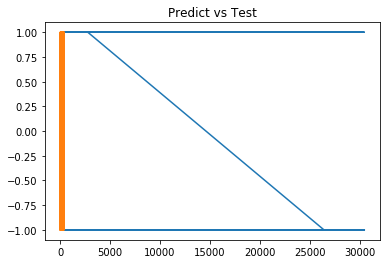

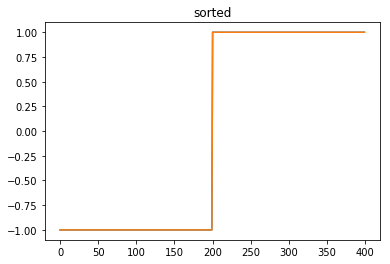

Accuracy: 0.675
F1 score: 0.675
precision:  0.675
recall:  0.675
specificity:  0.675
ROC_AUC_Score:  0.6750000000000002
[[135  65]
 [ 65 135]]
              precision    recall  f1-score   support

          -1       0.68      0.68      0.68       200
           1       0.68      0.68      0.68       200

   micro avg       0.68      0.68      0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



Text(0.5, 1.0, 'LDA Discriminant Functions')

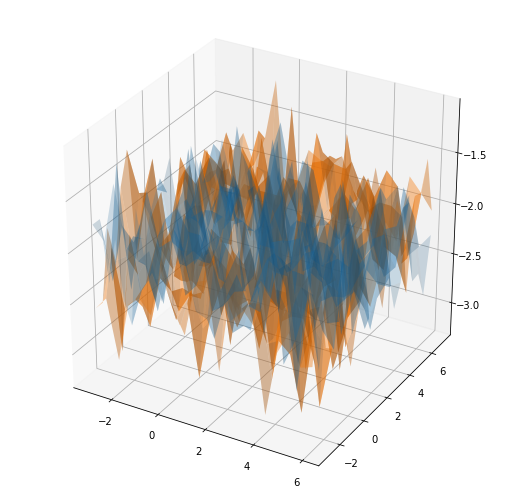

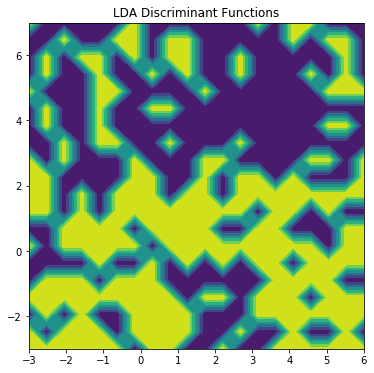

In [30]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
Xtest = np.array(Xtest)
p,d1_p,d2_p = lda.use(Xtest)
xs, ys = np.meshgrid(np.linspace(-3,6, 20), np.linspace(-3,7, 20))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")
ax.plot_surface(xs, ys, (d1_p.reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, (d2_p.reshape(xs.shape)), alpha=0.4)
plt.title("LDA Discriminant Functions")

In the above experiment I have implemented the LDA algorithm using three of the most correlated feature variables that were workplace, occupation and education as described by the correlation matrix and one target variable and keeping the dataset size as 2000. It has given me accuracy of 0.67, F1 score of 0.67, precision of 0.67, recall of 0.67, specificity of 0.67 and ROC score of 0.76. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 135 values of first class and 135 values of the second class perfectly. But it has not performed better than QDA and thus QDA performs much better in this experiment as well.

## Experiment 3: With variable size dataset

In [31]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


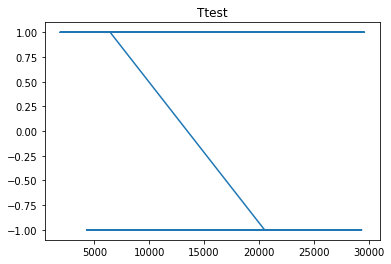

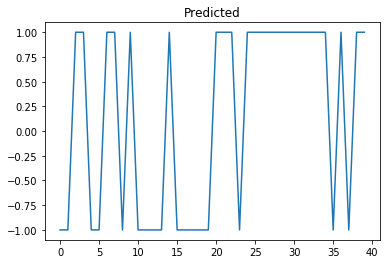

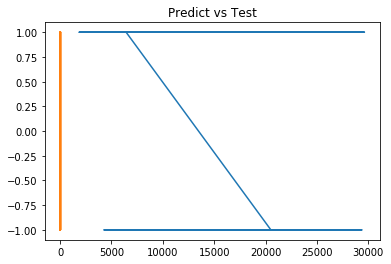

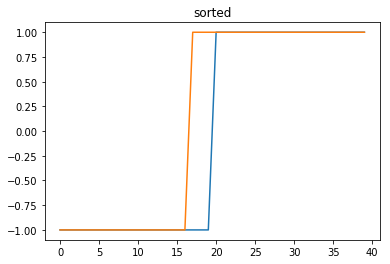

Accuracy: 0.775
F1 score: 0.7906976744186046
precision:  0.7391304347826086
recall:  0.85
specificity:  0.7
ROC_AUC_Score:  0.7749999999999999
[[14  6]
 [ 3 17]]
              precision    recall  f1-score   support

          -1       0.82      0.70      0.76        20
           1       0.74      0.85      0.79        20

   micro avg       0.78      0.78      0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



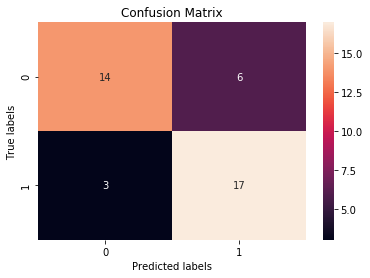

In [32]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))


In [33]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=200)
T2 = T2.sample(n=200)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (320, 9)
The Shape of T train data set is (320, 1)
The Shape of X test data set is (80, 9)
The Shape of T test data set is (80, 1)


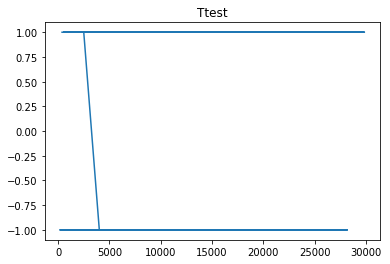

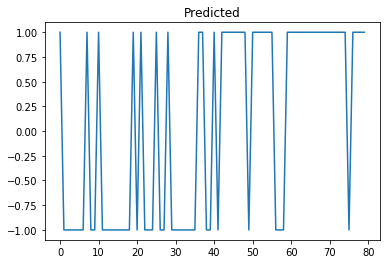

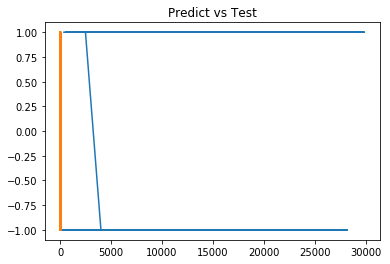

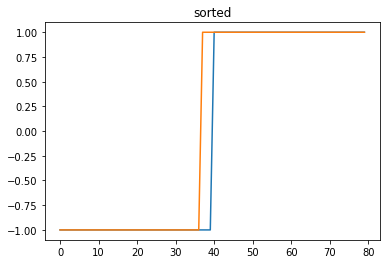

Accuracy: 0.8125
F1 score: 0.8192771084337349
precision:  0.7906976744186046
recall:  0.85
specificity:  0.775
ROC_AUC_Score:  0.8125
[[31  9]
 [ 6 34]]
              precision    recall  f1-score   support

          -1       0.84      0.78      0.81        40
           1       0.79      0.85      0.82        40

   micro avg       0.81      0.81      0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



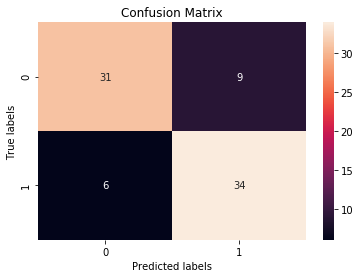

In [34]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))


In [35]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=500)
T2 = T2.sample(n=500)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (800, 9)
The Shape of T train data set is (800, 1)
The Shape of X test data set is (200, 9)
The Shape of T test data set is (200, 1)


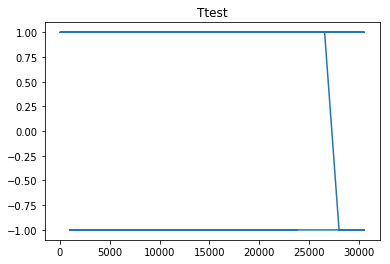

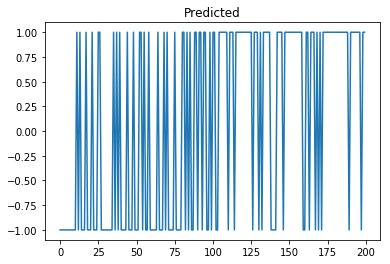

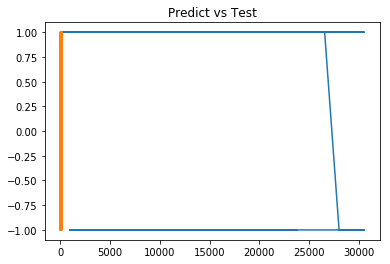

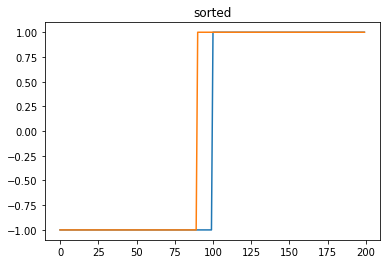

Accuracy: 0.75
F1 score: 0.761904761904762
precision:  0.7272727272727273
recall:  0.8
specificity:  0.7
ROC_AUC_Score:  0.75
[[70 30]
 [20 80]]
              precision    recall  f1-score   support

          -1       0.78      0.70      0.74       100
           1       0.73      0.80      0.76       100

   micro avg       0.75      0.75      0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



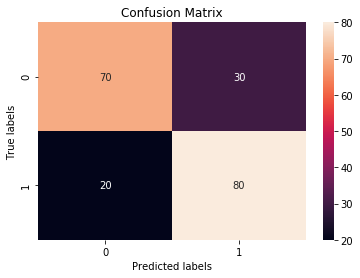

In [36]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))


In [37]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


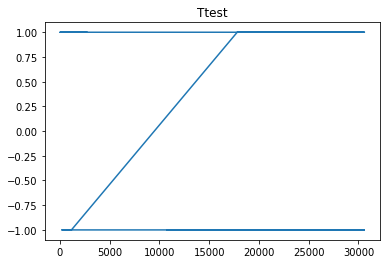

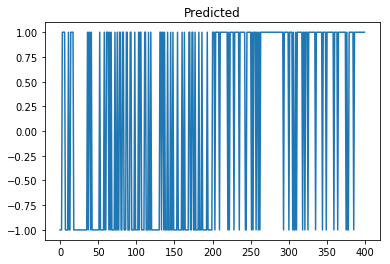

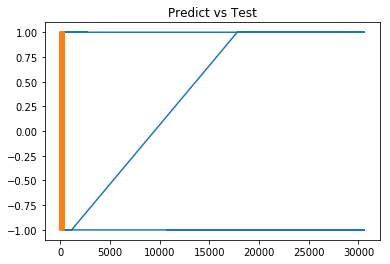

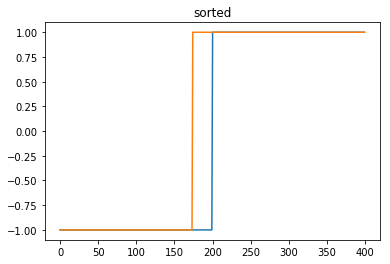

Accuracy: 0.78
F1 score: 0.7934272300469483
precision:  0.7477876106194691
recall:  0.845
specificity:  0.715
ROC_AUC_Score:  0.7800000000000001
[[143  57]
 [ 31 169]]
              precision    recall  f1-score   support

          -1       0.82      0.71      0.76       200
           1       0.75      0.84      0.79       200

   micro avg       0.78      0.78      0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



Text(0.5, 1.0, 'LDA Discriminant Functions')

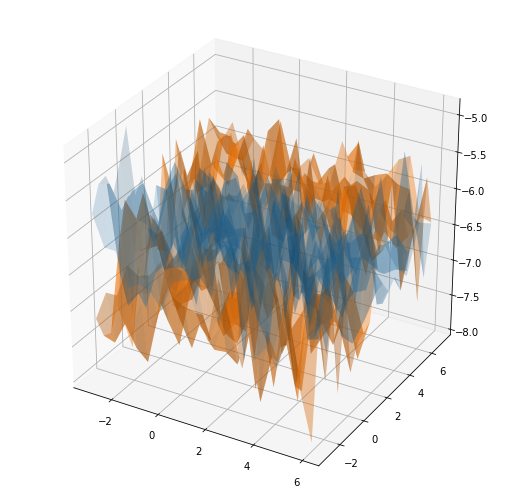

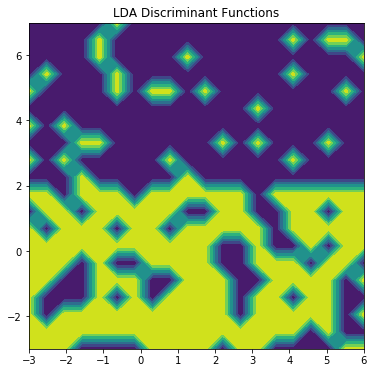

In [38]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
Xtest = np.array(Xtest)
p,d1_p,d2_p = lda.use(Xtest)
xs, ys = np.meshgrid(np.linspace(-3,6, 20), np.linspace(-3,7, 20))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")
ax.plot_surface(xs, ys, (d1_p.reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, (d2_p.reshape(xs.shape)), alpha=0.4)
plt.title("LDA Discriminant Functions")

In [39]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=2000)
T2 = T2.sample(n=2000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (3200, 9)
The Shape of T train data set is (3200, 1)
The Shape of X test data set is (800, 9)
The Shape of T test data set is (800, 1)


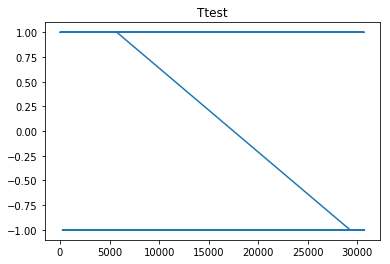

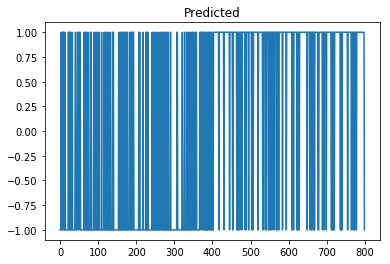

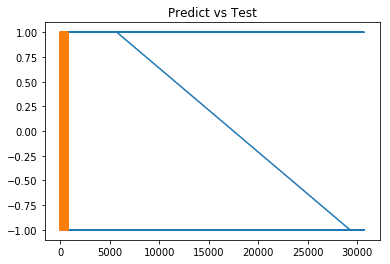

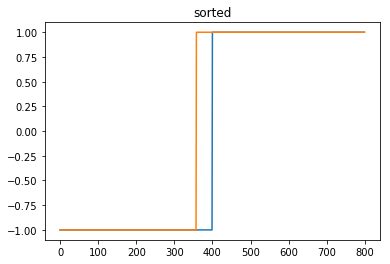

Accuracy: 0.785
F1 score: 0.7957244655581948
precision:  0.7579185520361991
recall:  0.8375
specificity:  0.7325
ROC_AUC_Score:  0.7849999999999999
[[293 107]
 [ 65 335]]
              precision    recall  f1-score   support

          -1       0.82      0.73      0.77       400
           1       0.76      0.84      0.80       400

   micro avg       0.79      0.79      0.79       800
   macro avg       0.79      0.79      0.78       800
weighted avg       0.79      0.79      0.78       800



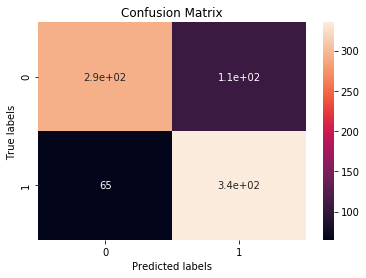

In [40]:
X = Xtrain.values
T = np.array(Ttrain)
lda=LDA_Algorithm()
lda.train(X,T)
lpredict,d1,d2=lda.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(lpredict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(lpredict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(lpredict))
plt.show()
cf=confusion_matrix(Ttest, lpredict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,lpredict))
print('F1 score:', f1_score(Ttest,lpredict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
roc_score = roc_auc_score(Ttest, lpredict)
print('ROC_AUC_Score: ',roc_score )
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, lpredict)
print(cf)
print(classification_report(Ttest,lpredict))


For my final experiment I have used variable dataset sizes to implement LDA algorithm and see the effect of dataset size on the algorithm's performance. I have used all the feature variables against one target variable which is income. In all the cases I was able to achieve an accuracy between 0.75 and 0.8 and thus it would be right to say that it performs quite well. But in comparison to QDA even though it predicts majority of the values correctly, it still lags behind QDA in terms of accuracy and other evaluation metrices as well.

### Experiments for Logistic Regression

## Experiment 1: All feature variables with alpha 0.01 and niter 1000

In [41]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=500)
T2 = T2.sample(n=500)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (800, 9)
The Shape of T train data set is (800, 1)
The Shape of X test data set is (200, 9)
The Shape of T test data set is (200, 1)


On test data

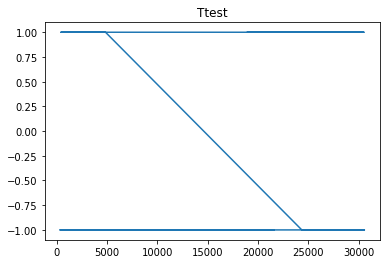

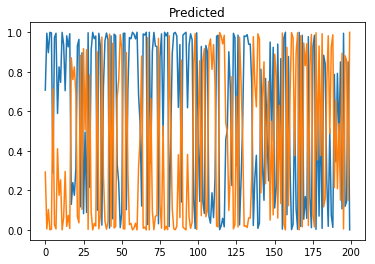

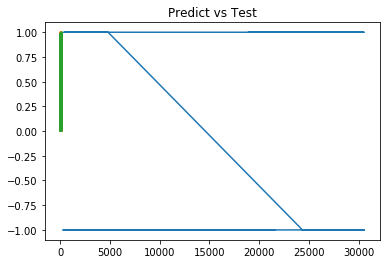

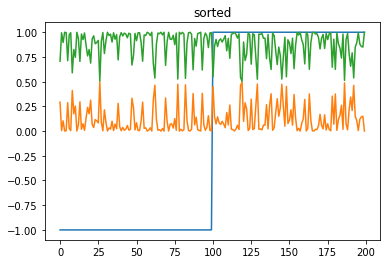

Accuracy: 0.64
F1 score: 0.6129032258064515
precision:  0.6627906976744186
recall:  0.57
specificity:  0.71
[[71 29]
 [43 57]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       100
           1       0.66      0.57      0.61       100

   micro avg       0.64      0.64      0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200



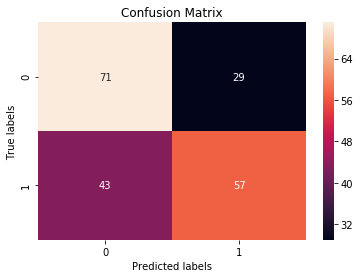

In [42]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))


In the above experiment I will be implementing the logistic regresison algorithm on a dataset of size 1000 and using all the feature variables against one target variable that is income. I have used the learning rate as 0.1 and number of iterations as 10. It has given me accuracy of 0.64, F1 score of 0.61, precision of 0.66, recall of 0.57, specificity of 0.71. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 71 values of first class and 57 values of the second class perfectly but the accuracy is still very low. In this experiment QDA and LDA were able to give better results.

Train data

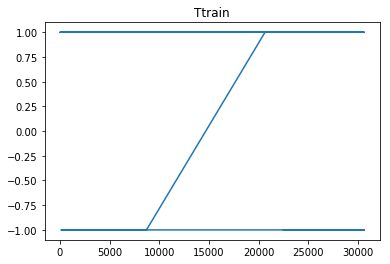

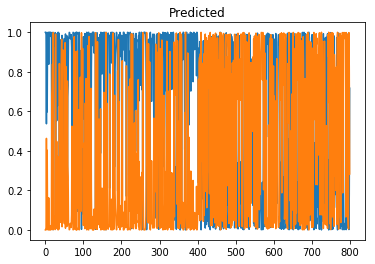

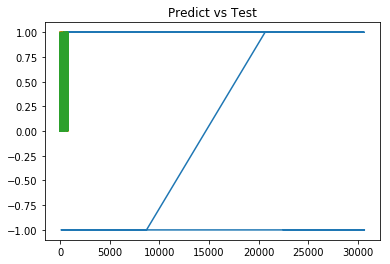

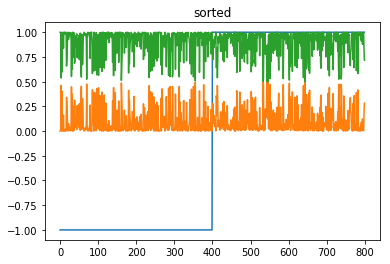

Accuracy: 0.6875
F1 score: 0.6565934065934066
precision:  0.7286585365853658
recall:  0.5975
specificity:  0.7775
[[311  89]
 [161 239]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       400
           1       0.73      0.60      0.66       400

   micro avg       0.69      0.69      0.69       800
   macro avg       0.69      0.69      0.68       800
weighted avg       0.69      0.69      0.68       800



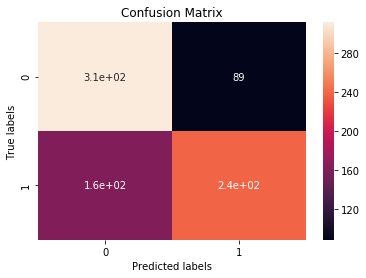

In [43]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtrain)
plt.title("Ttrain")
plt.plot(Ttrain)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttrain)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttrain))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttrain=np.array(Ttrain)
Ttrain=np.where(Ttrain==-1,0,1)
cf=confusion_matrix(Ttrain, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttrain,Logistic_predict))
print('F1 score:', f1_score(Ttrain,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttrain, Logistic_predict)
print(cf)
print(classification_report(Ttrain,Logistic_predict))


In the above experiment I will be implementing the logistic regresison algorithm on a dataset of size 1000 and using all the feature variables against one target variable that is income. I have used the learning rate as 0.1 and number of iterations as 10. So it is basically the same experiment as above but in order to test the test and train accuracies, I have performed it using the training data. It has given me accuracy of 0.68, F1 score of 0.65, precision of 0.72, recall of 0.59, specificity of 0.77. In totality it works very well for the dataset as it predicts majority of the values of both the classes as it has predicted 311 values of first class and 239 values of the second class perfectly but the accuracy is still very low. But it still performs better than test performed on testing data.

## Experiment 2: Three feature variables with alpha 0.01 and niter 1000

In [81]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['workclass','education','occupation']]
Xtest = T[['workclass','education','occupation']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (160, 3)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 3)
The Shape of T test data set is (40, 1)


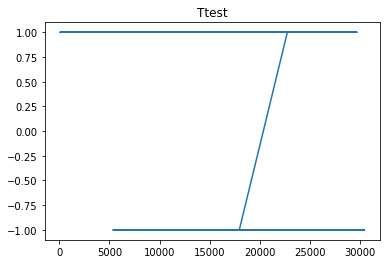

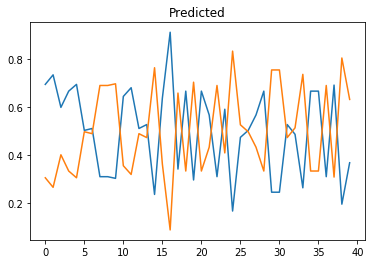

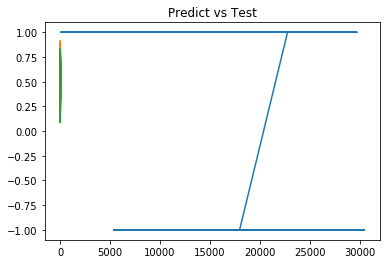

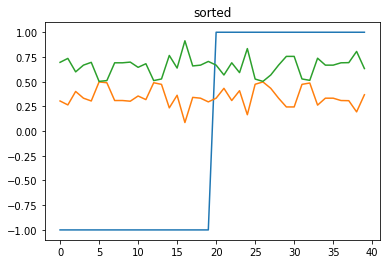

Accuracy: 0.6
F1 score: 0.5555555555555556
precision:  0.625
recall:  0.5
specificity:  0.7
[[14  6]
 [10 10]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        20
           1       0.62      0.50      0.56        20

   micro avg       0.60      0.60      0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



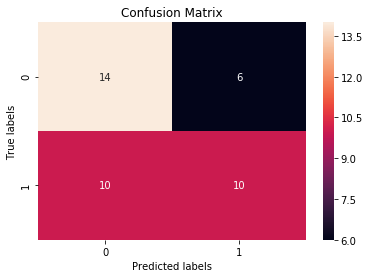

In [82]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,100)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In the above experiment I have implemented the Logistic Regression algorithm using three of the most correlated feature variables that were workplace, occupation and education as described by the correlation matrix and one target variable and keeping the dataset size as 200. It has given me accuracy of 0.6, F1 score of 0.55, precision of 0.62, recall of 0.5, specificity of 0.7. We can see that in comparison to all feature values, it has not performed very well. There might be some difference due to different values being selected from the dataset. But more or less the algorithm will still perform almost in this manner only. Hence it is a good algorithm as it does perfrom fairly well but using all features gives better results.

## Experiment 3: All feature variables with variable alpha and niter 10

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


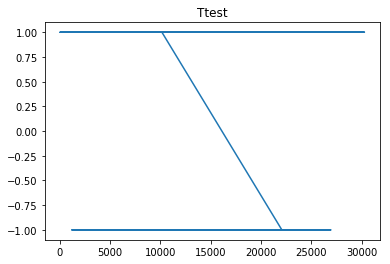

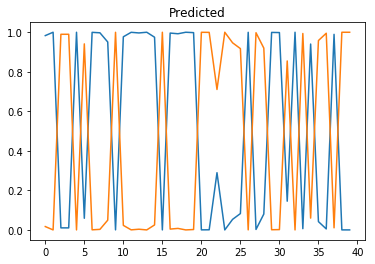

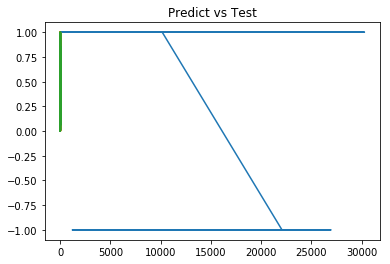

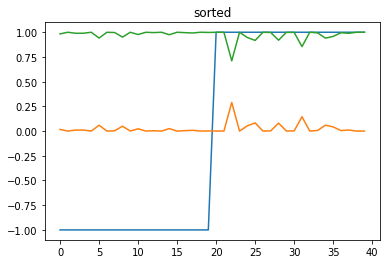

Accuracy: 0.725
F1 score: 0.717948717948718
precision:  0.7368421052631579
recall:  0.7
specificity:  0.75
[[15  5]
 [ 6 14]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.74      0.70      0.72        20

   micro avg       0.72      0.72      0.73        40
   macro avg       0.73      0.72      0.72        40
weighted avg       0.73      0.72      0.72        40



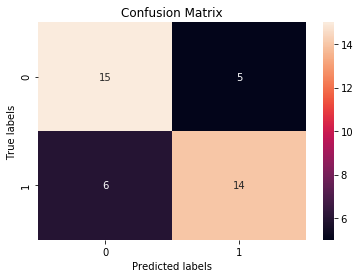

In [56]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.1,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


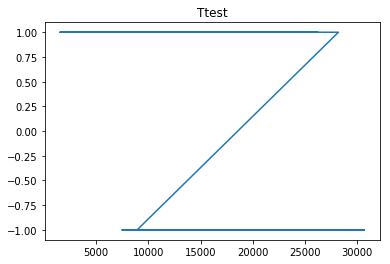

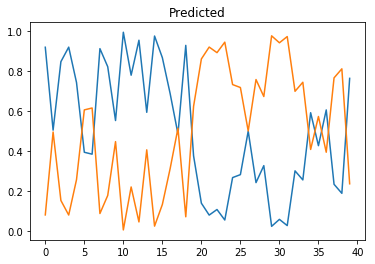

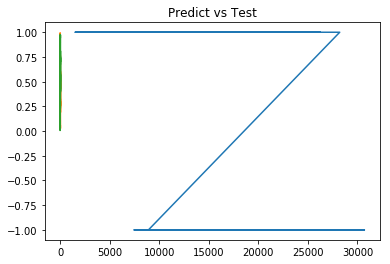

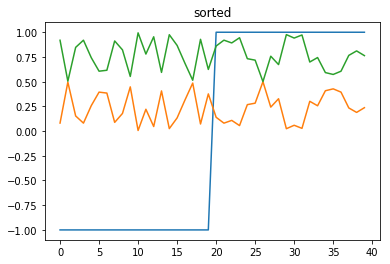

Accuracy: 0.825
F1 score: 0.8292682926829269
precision:  0.8095238095238095
recall:  0.85
specificity:  0.8
[[16  4]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.81      0.85      0.83        20

   micro avg       0.82      0.82      0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



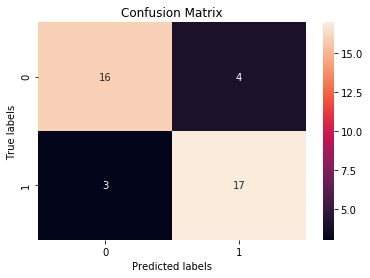

In [57]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


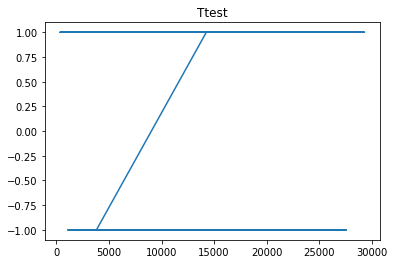

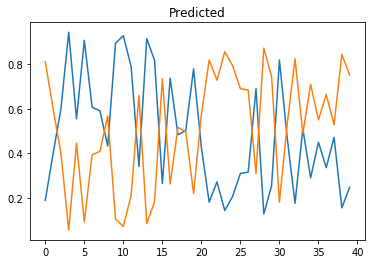

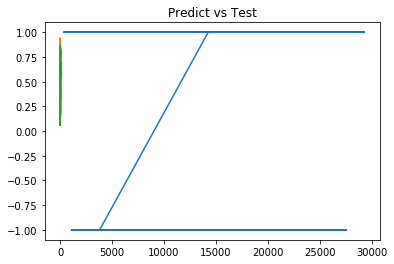

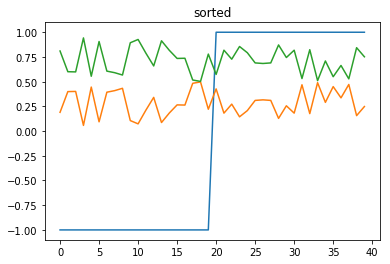

Accuracy: 0.775
F1 score: 0.7906976744186046
precision:  0.7391304347826086
recall:  0.85
specificity:  0.7
[[14  6]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.74      0.85      0.79        20

   micro avg       0.78      0.78      0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



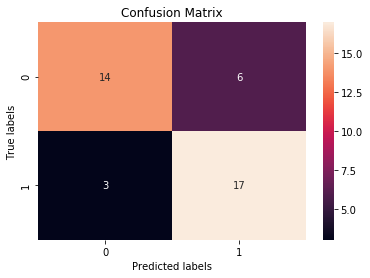

In [58]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.001,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


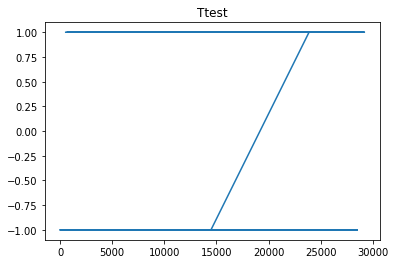

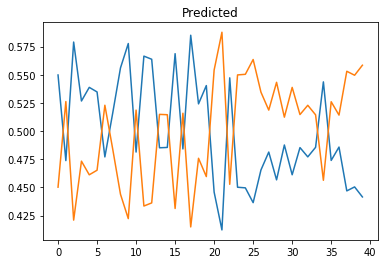

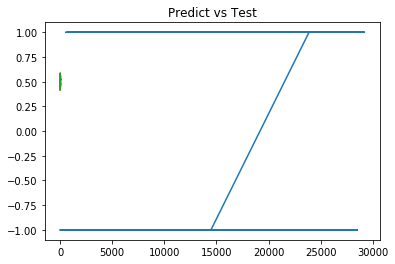

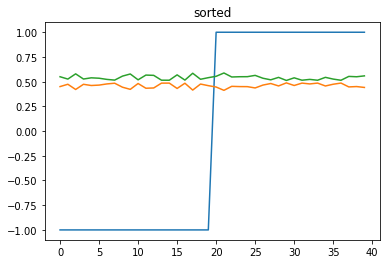

Accuracy: 0.8
F1 score: 0.8181818181818182
precision:  0.75
recall:  0.9
specificity:  0.7
[[14  6]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.75      0.90      0.82        20

   micro avg       0.80      0.80      0.80        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



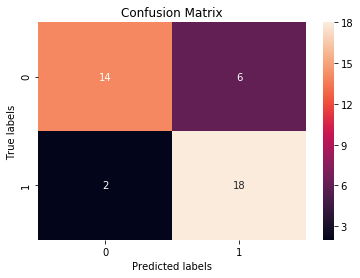

In [59]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.0001,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


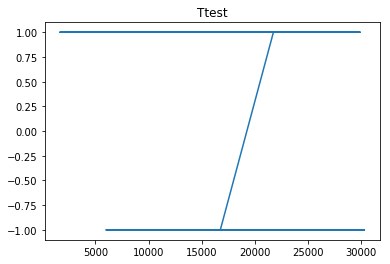

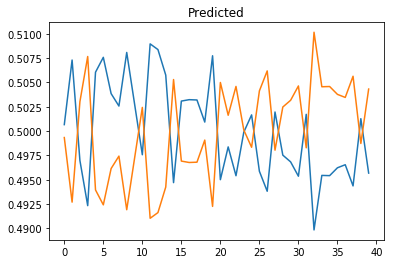

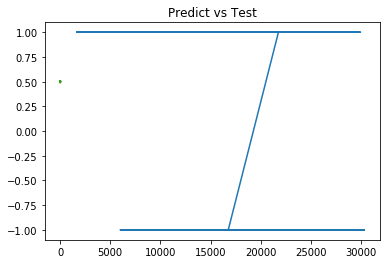

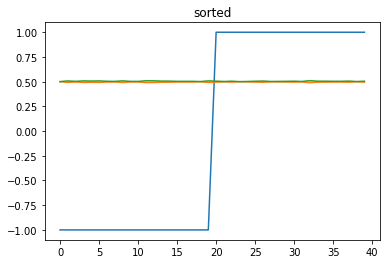

Accuracy: 0.8
F1 score: 0.8000000000000002
precision:  0.8
recall:  0.8
specificity:  0.8
[[16  4]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.80      0.80      0.80        20

   micro avg       0.80      0.80      0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



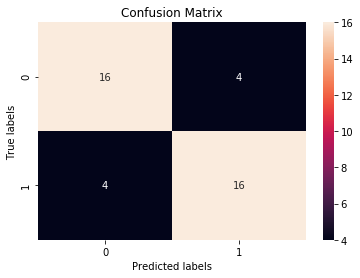

In [60]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.00001,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In the above experiment I have implemented the Logistic Regression model on a dataset of size 2000 using all the feature variables against one target variable that is income. I have kept the number of iterations constant at 10 and using varying values of learning rate. It is quite noticeable that accuracy remained same with all levels of learning rates. Thus same as pocket algorithm, this algorithm also does not vary with varying learning rates and gives constant result.

## Experiment 4: All feature variables with alpha 0.1 and variable niter

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


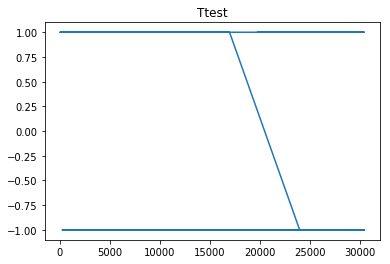

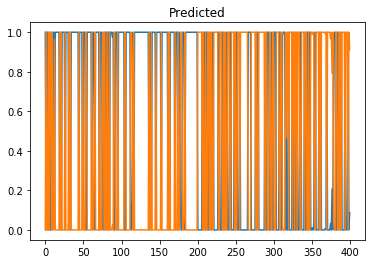

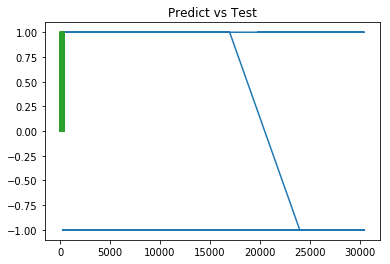

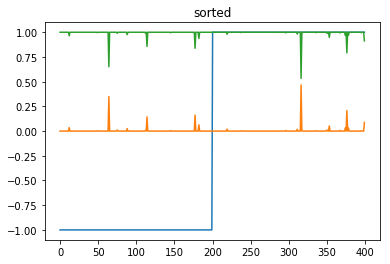

Accuracy: 0.715
F1 score: 0.6951871657754011
precision:  0.7471264367816092
recall:  0.65
specificity:  0.78
[[156  44]
 [ 70 130]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       200
           1       0.75      0.65      0.70       200

   micro avg       0.71      0.71      0.71       400
   macro avg       0.72      0.72      0.71       400
weighted avg       0.72      0.71      0.71       400



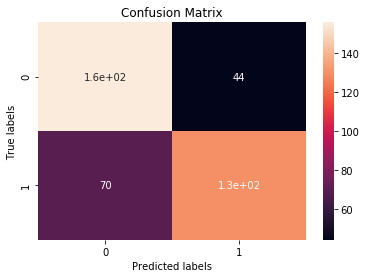

In [61]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.1,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


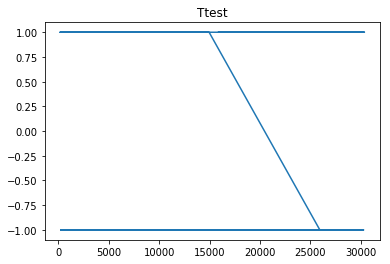

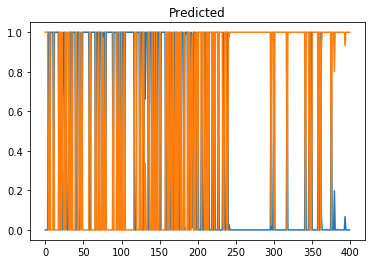

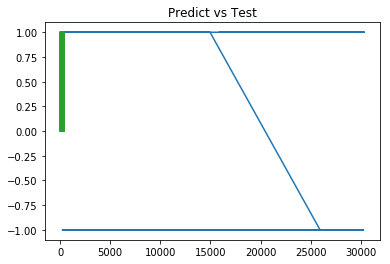

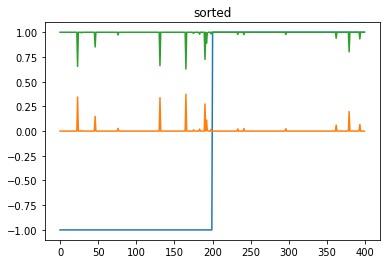

Accuracy: 0.7825
F1 score: 0.8027210884353742
precision:  0.7344398340248963
recall:  0.885
specificity:  0.68
[[136  64]
 [ 23 177]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       200
           1       0.73      0.89      0.80       200

   micro avg       0.78      0.78      0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



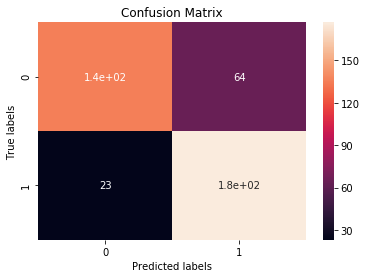

In [62]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.1,100)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


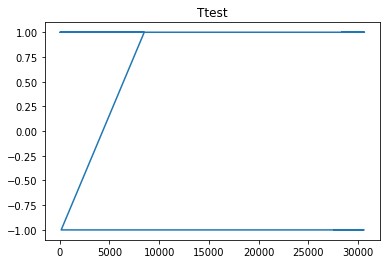

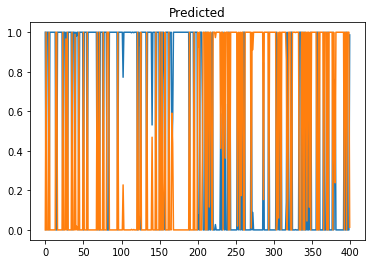

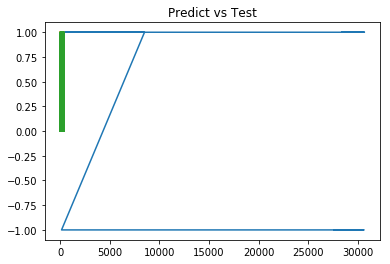

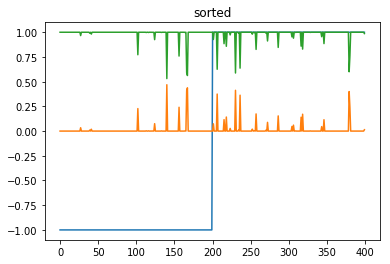

Accuracy: 0.8
F1 score: 0.7894736842105262
precision:  0.8333333333333334
recall:  0.75
specificity:  0.85
[[170  30]
 [ 50 150]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       200
           1       0.83      0.75      0.79       200

   micro avg       0.80      0.80      0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



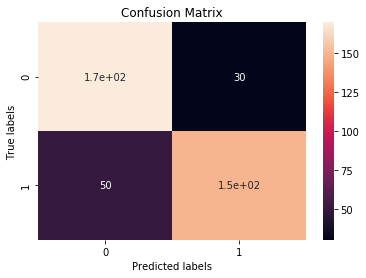

In [63]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.1,1000)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


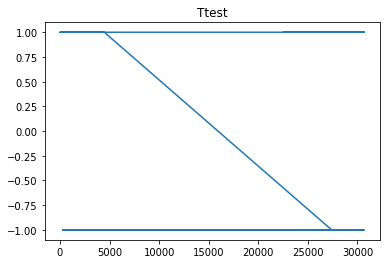

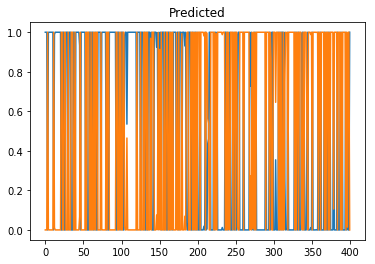

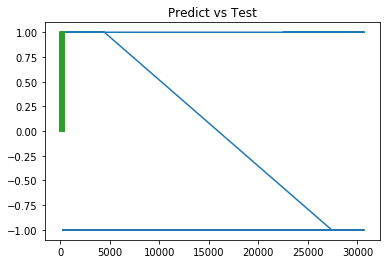

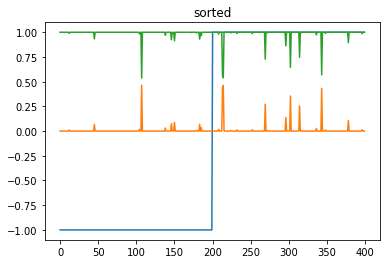

Accuracy: 0.71
F1 score: 0.7142857142857142
precision:  0.7038834951456311
recall:  0.725
specificity:  0.695
[[139  61]
 [ 55 145]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       200
           1       0.70      0.72      0.71       200

   micro avg       0.71      0.71      0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



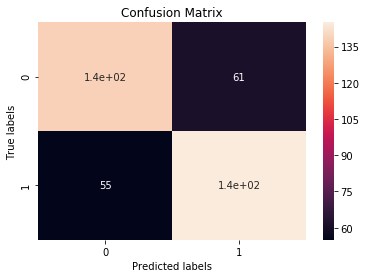

In [64]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.1,10000)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


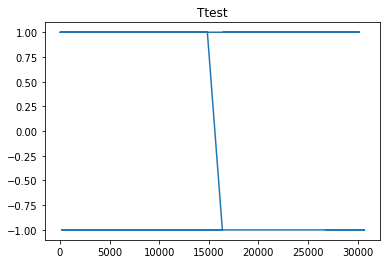

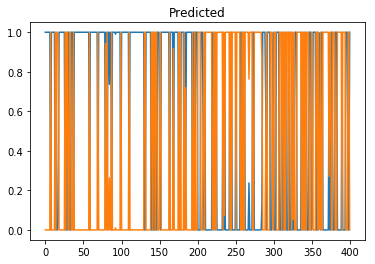

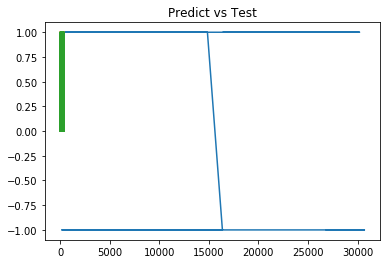

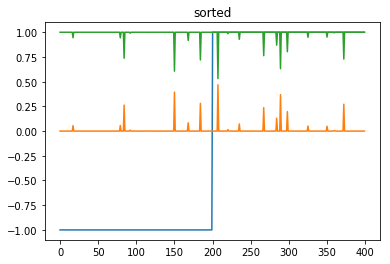

Accuracy: 0.735
F1 score: 0.7103825136612022
precision:  0.7831325301204819
recall:  0.65
specificity:  0.82
[[164  36]
 [ 70 130]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       200
           1       0.78      0.65      0.71       200

   micro avg       0.73      0.73      0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



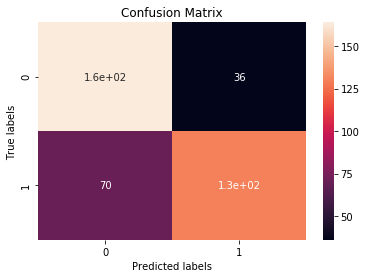

In [65]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.1,100000)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In the above experiment I have implemented the Logistic Regression model on a dataset of size 2000 using all the feature variables against one target variable that is income. I have kept the learning rate constant at 0.1 and using varying values of iterations. It is quite noticeable that accuracy increased with the number of iterations mostly. The algorithm performs well as it gives quite high accuracy and a very decent F1 score.

## Experiment 5: All feature variables with alpha 0.01 and niter 1000 and variable datasize


In [66]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=100)
T2 = T2.sample(n=100)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (160, 9)
The Shape of T train data set is (160, 1)
The Shape of X test data set is (40, 9)
The Shape of T test data set is (40, 1)


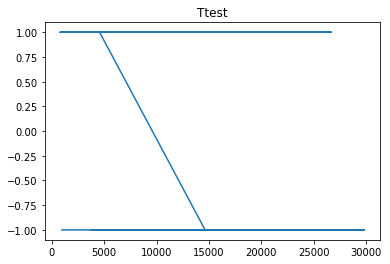

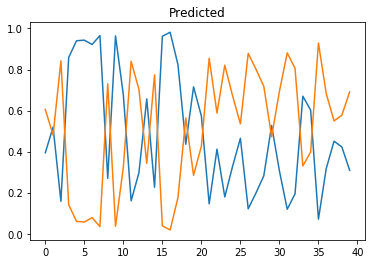

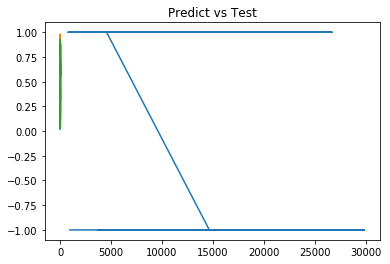

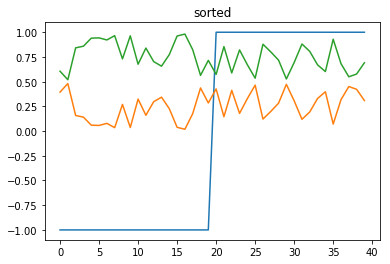

Accuracy: 0.725
F1 score: 0.7441860465116279
precision:  0.6956521739130435
recall:  0.8
specificity:  0.65
[[13  7]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.70      0.80      0.74        20

   micro avg       0.72      0.72      0.73        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.72        40



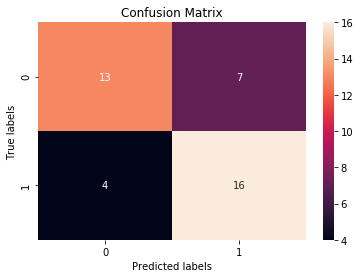

In [67]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In [68]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=500)
T2 = T2.sample(n=500)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (800, 9)
The Shape of T train data set is (800, 1)
The Shape of X test data set is (200, 9)
The Shape of T test data set is (200, 1)


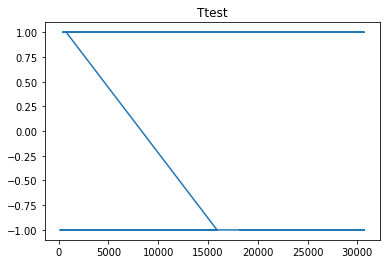

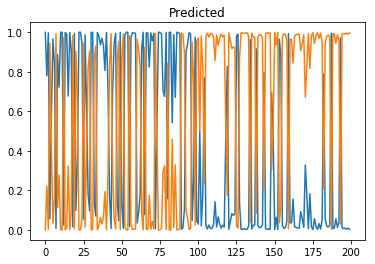

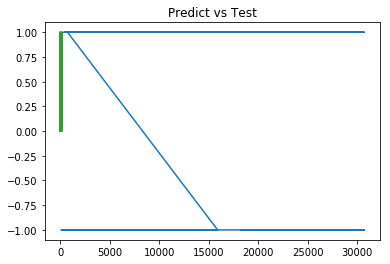

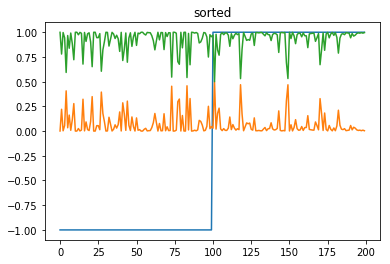

Accuracy: 0.78
F1 score: 0.7962962962962963
precision:  0.7413793103448276
recall:  0.86
specificity:  0.7
[[70 30]
 [14 86]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       100
           1       0.74      0.86      0.80       100

   micro avg       0.78      0.78      0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



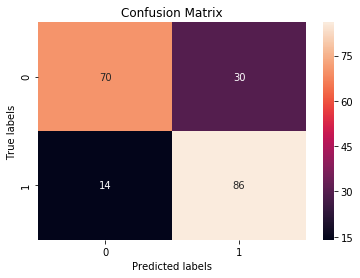

In [69]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In [70]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=1000)
T2 = T2.sample(n=1000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (1600, 9)
The Shape of T train data set is (1600, 1)
The Shape of X test data set is (400, 9)
The Shape of T test data set is (400, 1)


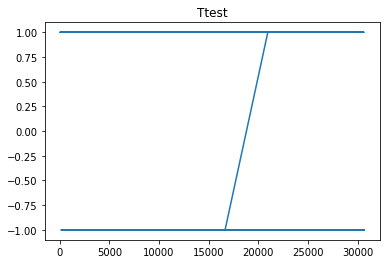

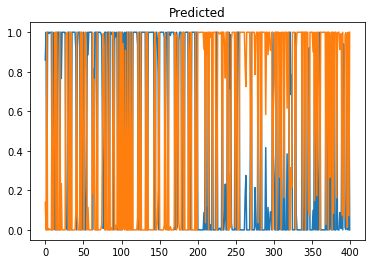

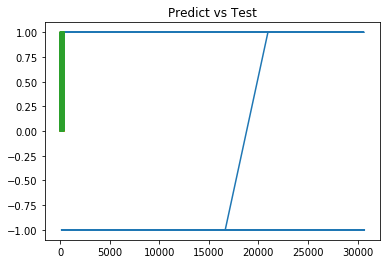

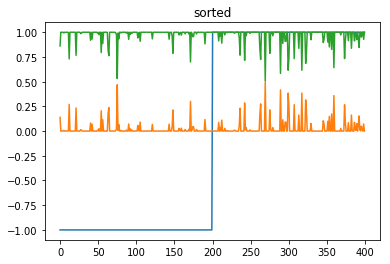

Accuracy: 0.7475
F1 score: 0.754257907542579
precision:  0.7345971563981043
recall:  0.775
specificity:  0.72
[[144  56]
 [ 45 155]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       200
           1       0.73      0.78      0.75       200

   micro avg       0.75      0.75      0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



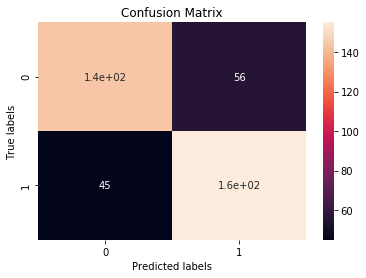

In [71]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In [72]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=2000)
T2 = T2.sample(n=2000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (3200, 9)
The Shape of T train data set is (3200, 1)
The Shape of X test data set is (800, 9)
The Shape of T test data set is (800, 1)


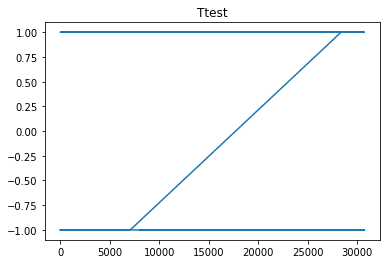

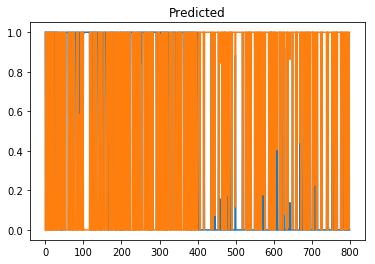

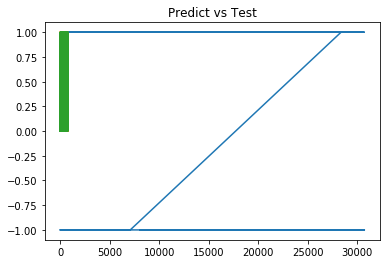

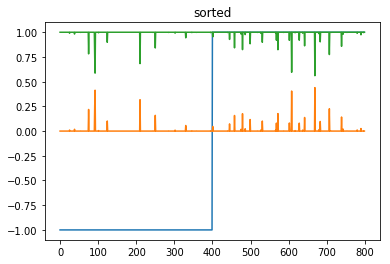

Accuracy: 0.72625
F1 score: 0.7420494699646643
precision:  0.7015590200445434
recall:  0.7875
specificity:  0.665
[[266 134]
 [ 85 315]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       400
           1       0.70      0.79      0.74       400

   micro avg       0.73      0.73      0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



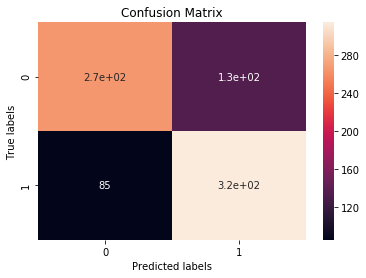

In [73]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

In [74]:
T1 = df.loc[(df['income'] == -1)]
T2 = df.loc[(df['income']== 1)]
T1 = T1.sample(n=5000)
T2 = T2.sample(n=5000)
Xs, Ts = partition(T1, T2)
X1 = [Xs[0],Ts[0]]
X2 = [Xs[1],Ts[1]]
X = pd.concat(X1)
T = pd.concat(X2)

Xtrain = X[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Xtest = T[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week']]
Ttrain = X[['income']]
Ttest = T[['income']]
print("The Shape of X train data set is",Xtrain.shape)
print("The Shape of T train data set is",Ttrain.shape)
print("The Shape of X test data set is",Xtest.shape)
print("The Shape of T test data set is",Ttest.shape)

The Shape of X train data set is (8000, 9)
The Shape of T train data set is (8000, 1)
The Shape of X test data set is (2000, 9)
The Shape of T test data set is (2000, 1)


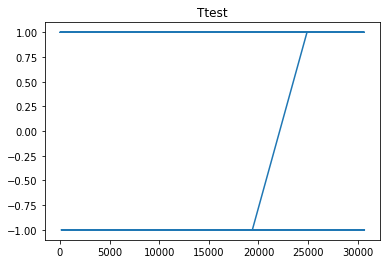

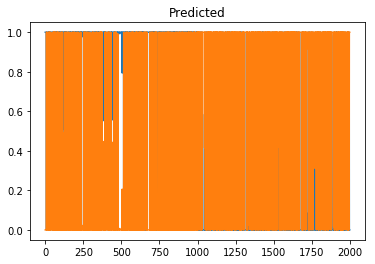

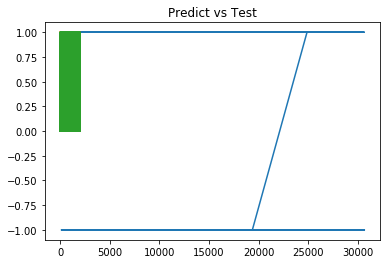

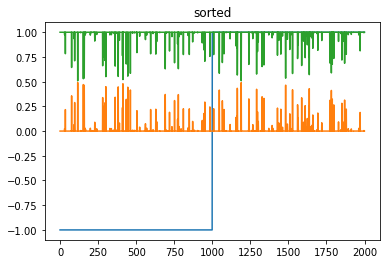

Accuracy: 0.753
F1 score: 0.753
precision:  0.753
recall:  0.753
specificity:  0.753
[[753 247]
 [247 753]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.75      0.75      0.75      1000

   micro avg       0.75      0.75      0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



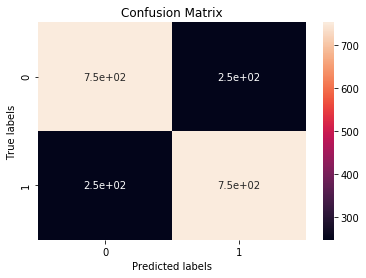

In [75]:
X = Xtrain.values
T = np.array(Ttrain)
logistic = Logistic_Regression(0.01,10)
logistic.train(X, T)
Logistic_predict = logistic.use(Xtest)
plt.title("Ttest")
plt.plot(Ttest)
plt.show()
plt.title("Predicted")
plt.plot(Logistic_predict)
plt.show()
plt.title("Predict vs Test")
plt.plot(Ttest)
plt.plot(Logistic_predict)
plt.show()
plt.title("sorted")
plt.plot(np.sort(Ttest))
plt.plot(np.sort(Logistic_predict))
plt.show()
Logistic_predict = np.argmax(Logistic_predict, 1)
Ttest=np.array(Ttest)
Ttest=np.where(Ttest==-1,0,1)
cf=confusion_matrix(Ttest, Logistic_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy:', accuracy_score(Ttest,Logistic_predict))
print('F1 score:', f1_score(Ttest,Logistic_predict))
precision=(TP/(TP+FP))
print('precision: ', precision)
recall = (TP/(TP+FN))
print('recall: ', recall)
specificity=TN/(TN+FP)
print('specificity: ', specificity)
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cf=confusion_matrix(Ttest, Logistic_predict)
print(cf)
print(classification_report(Ttest,Logistic_predict))

For the above experiment, I have used variable sized datasets using all feature variables against one target variable that is income. I have kept the learning rate constant at 0.01 and number of iterations at 10. As I change the dataset size from 200 to 10000, it can be seen that there has not been a huge change in the accuracy score and other evaluation metrices. The algorithm has performed fairly decently in all the cases with a decent accuracy and f1 score.

### Train and Test Accuracies

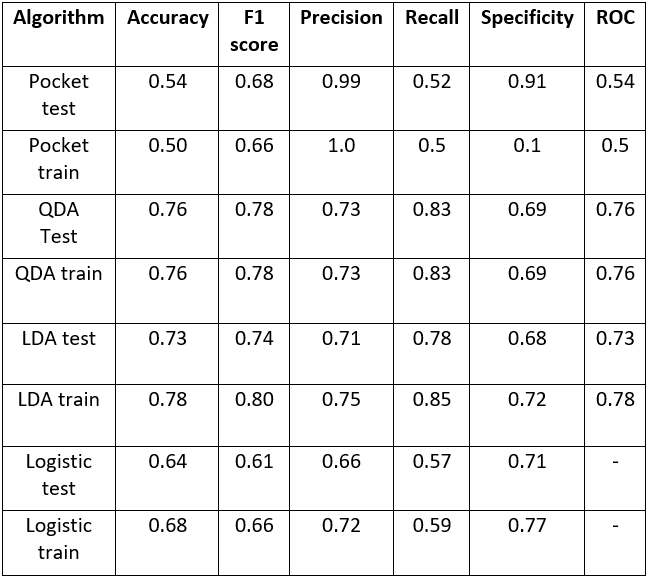

From the image above it can be seen that for pocket algorithm and QDA the performance did not get enhanced when trying with the dataset and the accuracies remained same. But in case of LDA and Logistic the accuracy improved immensely when implementing the lgorithms using train dataset. 

### Comparison of Algorithms

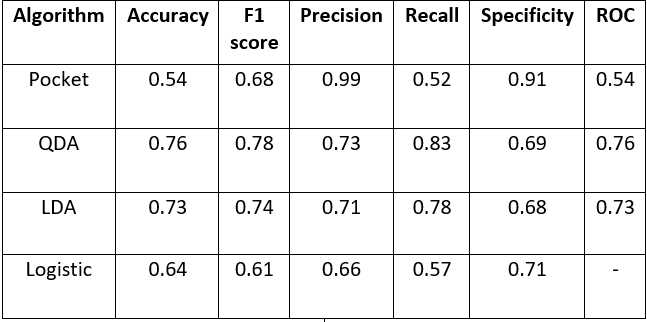

It is very clear from the image of results attached for the major first experiment using all feature values that QDA performed the best out of all followed by LDA, pocket algorithm and logistic regression. There might be differences amongst results but for my dataset these are the results I received. Also, I learnt that pocket algorithm is the most time taking algorithm. Also in some cases I was unable to predicted values of a class at all which might be due to wrong selection of random data samples. Overall this was an extremely learning assignment through which I was able to develop an understanding of machine learning algorithms much deeply. Also, since I am selecting random samples from the entire dataset for the assignment, if you will run the whole document you might witness values different from those I have achieved as I have not kept the dataset very constant. I have mentioned values that I achieved during the experiments.

### Conclusion
Through this assignment I was able to learn classification models in machine learning deeply and was able to implement them. I was also able to enhance my visualization skills for demonstrating the results better. I was able to study various evaluation metrices and used them for evaluating the performance of different models in different situations. I was also able to introduce myself to new data preprocessing methods as this assignment demanded a much higher level of preprocessing. This was an extremely challenging assignment as it included a lot of different algorithms and required a higher level of understanding. I was able to use numerous libraries like scikitlearn for evaluation metrics, matplotlib and seaborn for plotting graphs and visualizations, numpy and pandas for data manipulation and calculations.

### References


* https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb
* https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb
* https://archive.ics.uci.edu/ml/datasets/census+income
* http://www.numpy.org/
* https://pandas.pydata.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/
* https://www.kaggle.com/uciml/adult-census-income
